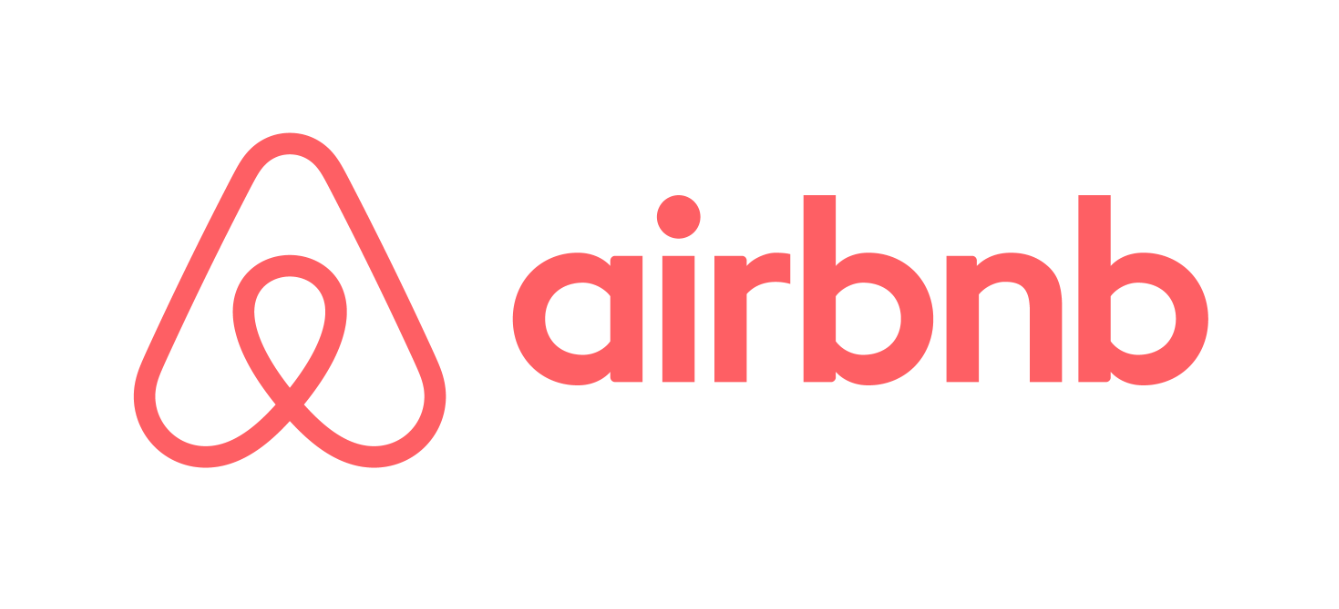

## MSCA 37014- Python for Analytics 

### Airbnb Price Prediction Project

Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

Airbnb is interested in better understanding data relating to price of listings on their website. They want to gain insight into its usefulness in the listing assessment process. The dataset consists of a random sample of homes.

A data dictionary is saved as an excel file here: 

In [1]:
# import packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

np.set_printoptions(precision=2)
pd.set_option('display.max_columns', None)
%matplotlib inline
bin_size=10
plt.rcParams.update({'figure.max_open_warning': 0})
%pprint = False

Pretty printing has been turned OFF


In [2]:
df = pd.read_csv('data/listings.csv.gz')

## Exploratory Data Analysis

In [3]:
df.shape

(16116, 74)

In [4]:
df.head()

id                         listing_url       scrape_id last_scraped  \
0   2818   https://www.airbnb.com/rooms/2818  20210907032724   2021-09-07   
1  20168  https://www.airbnb.com/rooms/20168  20210907032724   2021-09-07   
2  25428  https://www.airbnb.com/rooms/25428  20210907032724   2021-09-07   
3  27886  https://www.airbnb.com/rooms/27886  20210907032724   2021-09-07   
4  28871  https://www.airbnb.com/rooms/28871  20210907032724   2021-09-08   

                                                name  \
0           Quiet Garden View Room & Super Fast WiFi   
1       Studio with private bathroom in the centre 1   
2  Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.   
3  Romantic, stylish B&B houseboat in canal district   
4                            Comfortable double room   

                                         description  \
0  Quiet Garden View Room & Super Fast WiFi<br />...   
1  17th century Dutch townhouse in the heart of t...   
2  Lovely apt in Centre ( lift & fireplace) near ...   
3  Stylish and romantic houseboat on fantastic hi...   
4  <b>The space</b><br />In a monumental house ri...   

                               neighborhood_overview  \
0  Indische Buurt ("Indies Neighborhood") is a ne...   
1  Located just in between famous central canals....   
2                                                NaN   
3         Central, quiet, safe, clean and beautiful.   
4       Flower market , Leidseplein , Rembrantsplein   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/10272854/8dcc...     3159   
1  https://a0.muscache.com/pictures/69979628/fd6a...    59484   
2  https://a0.muscache.com/pictures/138431/7079a9...    56142   
3  https://a0.muscache.com/pictures/02c2da9d-660e...    97647   
4  https://a0.muscache.com/pictures/160889/362340...   124245   

                                   host_url  host_name  host_since  \
0    https://www.airbnb.com/users/show/3159     Daniel  2008-09-24   
1   https://www.airbnb.com/users/show/59484  Alexander  2009-12-02   
2   https://www.airbnb.com/users/show/56142       Joan  2009-11-20   
3   https://www.airbnb.com/users/show/97647       Flip  2010-03-23   
4  https://www.airbnb.com/users/show/124245      Edwin  2010-05-13   

                               host_location  \
0  Amsterdam, Noord-Holland, The Netherlands   
1  Amsterdam, Noord-Holland, The Netherlands   
2          New York, New York, United States   
3  Amsterdam, Noord-Holland, The Netherlands   
4  Amsterdam, Noord-Holland, The Netherlands   

                                          host_about host_response_time  \
0  Upon arriving in Amsterdam, one can imagine as...     within an hour   
1                  + (Phone number hidden by Airbnb)     within an hour   
2  We are a retired couple who live in NYC, and h...                NaN   
3  Marjan works in "eye" the dutch filmmuseum, an...     within an hour   
4                                                 Hi     within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                 100%                 t   
1               100%                 100%                 f   
2                NaN                   0%                 t   
3                86%                 100%                 t   
4               100%                  98%                 t   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/users/3159/profile_...   
1  https://a0.muscache.com/im/pictures/user/65092...   
2  https://a0.muscache.com/im/users/56142/profile...   
3  https://a0.muscache.com/im/users/97647/profile...   
4  https://a0.muscache.com/im/pictures/user/9986b...   

                                    host_picture_url   host_neighbourhood  \
0  https://a0.muscache.com/im/users/3159/profile_...       Indische Buurt   
1  https://a0.muscache.com/im/pictures/user/65092...       Grachtengordel   
2  https://a0.muscache.com/im/use

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16116 entries, 0 to 16115
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16116 non-null  int64  
 1   listing_url                                   16116 non-null  object 
 2   scrape_id                                     16116 non-null  int64  
 3   last_scraped                                  16116 non-null  object 
 4   name                                          16086 non-null  object 
 5   description                                   15893 non-null  object 
 6   neighborhood_overview                         10405 non-null  object 
 7   picture_url                                   16116 non-null  object 
 8   host_id                                       16116 non-null  int64  
 9   host_url                                      16116 non-null 

In [6]:
df.describe()

id     scrape_id       host_id  host_listings_count  \
count  1.611600e+04  1.611600e+04  1.611600e+04         16111.000000   
mean   2.118184e+07  2.021091e+13  6.976052e+07             2.023338   
std    1.352063e+07  1.683646e+00  9.027164e+07            23.344729   
min    2.818000e+03  2.021091e+13  3.159000e+03             0.000000   
25%    1.018020e+07  2.021091e+13  9.735558e+06             1.000000   
50%    1.926593e+07  2.021091e+13  2.974134e+07             1.000000   
75%    3.107548e+07  2.021091e+13  8.988321e+07             1.000000   
max    5.208280e+07  2.021091e+13  4.210037e+08          1992.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               16111.000000                           0.0  16116.000000   
mean                    2.023338                           NaN     52.365510   
std                    23.344729                           NaN      0.016563   
min                     0.000000                           NaN     52.290340   
25%                     1.000000                           NaN     52.355130   
50%                     1.000000                           NaN     52.364880   
75%                     1.000000                           NaN     52.375440   
max                  1992.000000                           NaN     52.425340   

          longitude  accommodates  bathrooms      bedrooms          beds  \
count  16116.000000  16116.000000        0.0  15218.000000  16019.000000   
mean       4.889434      2.836684        NaN      1.530096      1.758100   
std        0.036151      1.312016        NaN      0.951085      1.467627   
min        4.755710      0.000000        NaN      1.000000      0.000000   
25%        4.863690      2.000000        NaN      1.000000      1.000000   
50%        4.886900      2.000000        NaN      1.000000      1.000000   
75%        4.909160      4.000000        NaN      2.000000      2.000000   
max        5.066508     16.000000        NaN     50.000000     33.000000   

       minimum_nights  maximum_nights  minimum_minimum_nights  \
count    16116.000000    16116.000000            16113.000000   
mean         3.991189      608.146811                3.953578   
std         20.987452      540.665822               20.988709   
min          1.000000        1.000000                1.000000   
25%          2.000000       21.000000                2.000000   
50%          2.000000     1125.000000                2.000000   
75%          3.000000     1125.000000                3.000000   
max       1100.000000     1825.000000             1100.000000   

       maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
count            16113.000000            16113.000000            1.611300e+04   
mean                 4.149134              685.520449            2.672465e+05   
std                 21.034236              532.480917            2.392451e+07   
min                  1.000000                1.000000            1.000000e+00   
25%                  2.000000               28.000000            2.800000e+01   
50%                  3.000000             1125.000000            1.125000e+03   
75%                  3.000000             1125.000000            1.125000e+03   
max               1100.000000             1825.000000            2.147484e+09   

       minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated  \
count            16113.000000            1.611300e+04               0.0   
mean                 4.025489            2.666400e+05               NaN   
std                 20.996160            2.387038e+07               NaN   
min                  1.000000            1.000000e+00               NaN   
25%                  2.000000            2.800000e+01               NaN   
50%                  2.000000            1.125000e+03               NaN   
75%                  3.000000            1.125000e+03               NaN   
max               1100.000000            2.142

Some quick observations:

- host_listings count is highly sqewed. Probably an outlier in there. The max is 1992 when 75% of the data is 1. 
- Same with host_total_listings_count 
- neihbourhood_group_cleansed has no values 
- accomodates also seems to have a few really large values.
- bathrooms has no values
- bedroom seems to have an outlier. the max bedroom is 50. Same with beds (33), min_nights (1100), max_nights (1825), min_min_nights (1100), max_min_nights (1100), min_max_nights (1825), min_nights_avg_ntm (1100) 
- Not sure what the column max_max_nights represents. Shows really large values. 
- calendar_updated has no values 
- availability also seems to be highly skewed
- no of reviews alos seems to be highly skewed

In [7]:
# Converting price, host_acceptance_rate, host_response_rate to float
from re import sub
from decimal import Decimal

def convert_price_to_float(money):
    value = float(Decimal(sub(r'[^\d.]', '', money)))
    return value

df['price_ft'] = df['price'].str[1:].apply(lambda x: convert_price_to_float(x)) 
df['host_acceptance_rate'] = df['host_acceptance_rate'].str[:-1].apply(lambda x: float(x))
df['host_response_rate'] = df['host_response_rate'].str[:-1].apply(lambda x: float(x))

In [8]:
# separating the catgorical and numerical variables 
# Not including url columns in categorical and id cols in numerical

cat_cols = []
num_cols = []
extra = ['id', 'listing_url', 'scrape_id', 'last_scraped','name', 'description','neighborhood_overview','picture_url', 'host_id',
        'host_url','host_name','host_about', 'host_thumbnail_url','host_picture_url','license','neighbourhood_group_cleansed',
        'bathrooms','calendar_updated']

for i in df.columns:
    if (df[i].dtype == 'object') & (i not in extra):
        cat_cols.append(i)
    elif (df[i].dtype != 'object') & (i not in extra):
        num_cols.append(i)
    else:
        continue

In [9]:
cat_cols

['host_since', 'host_location', 'host_response_time', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'instant_bookable']

In [10]:
num_cols

['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'price_ft']

In [11]:
extra

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'license', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated']

In [12]:
# Looking at what unique values each categorical colum has 

for col in df.columns.values:
    if col in cat_cols:
        print(df[col].value_counts(normalize=True).round(decimals=4))
        print('\n')

2014-04-29    0.0026
2014-04-22    0.0019
2015-07-21    0.0019
2014-07-29    0.0016
2014-07-21    0.0015
               ...  
2018-08-19    0.0001
2011-06-16    0.0001
2012-04-17    0.0001
2010-08-04    0.0001
2021-06-03    0.0001
Name: host_since, Length: 3235, dtype: float64


Amsterdam, North Holland, Netherlands         0.5609
Amsterdam, North Holland, The Netherlands     0.1773
NL                                            0.0836
Amsterdam, Noord-Holland, The Netherlands     0.0566
Netherlands                                   0.0253
                                               ...  
Malmö, Sweden                                 0.0001
Loosdrecht, North Holland, Netherlands        0.0001
Ciudad de México, Ciudad de México, Mexico    0.0001
Marbella, Andalucía, Spain                    0.0001
Cannes, Provence-Alpes-Côte d'Azur, France    0.0001
Name: host_location, Length: 561, dtype: float64


within an hour        0.4942
within a day          0.2154
within a few hours    0.2107

Looking at the categorical variables:

- host_response_time: {within an hour, within a day, within a few hours, a few days or more}
- host_is_superhost: can be turned to 1,0 {13% are superhost}
- host_neighbourhoods: there are 68 different neighborhoods. Maybe there is a way to group some?
- host_verifications: a list of different ways to verify. We can maybe split it into columns of 1 and 0?
- host_has_profile_pic: 1,0 columns {99.8% have a profile pic}
- host_identity_verified: 1,0 column {67% have been verified} 
- neighbourhood: seems redundant 
- property_type: 67 different values. Maybe group them somehow?
- room_type: {Entire home/apt, Private room, Hotel room, Shared room}
- bathroom_text: should be a numerical value 
- amenities: split them and group them into smaller categories?
- price: should be a numerical column 
- has_availability: 1,0 column {96% have availability}
- instant_bookable: 1,0 column {77% are not instantly bookable}

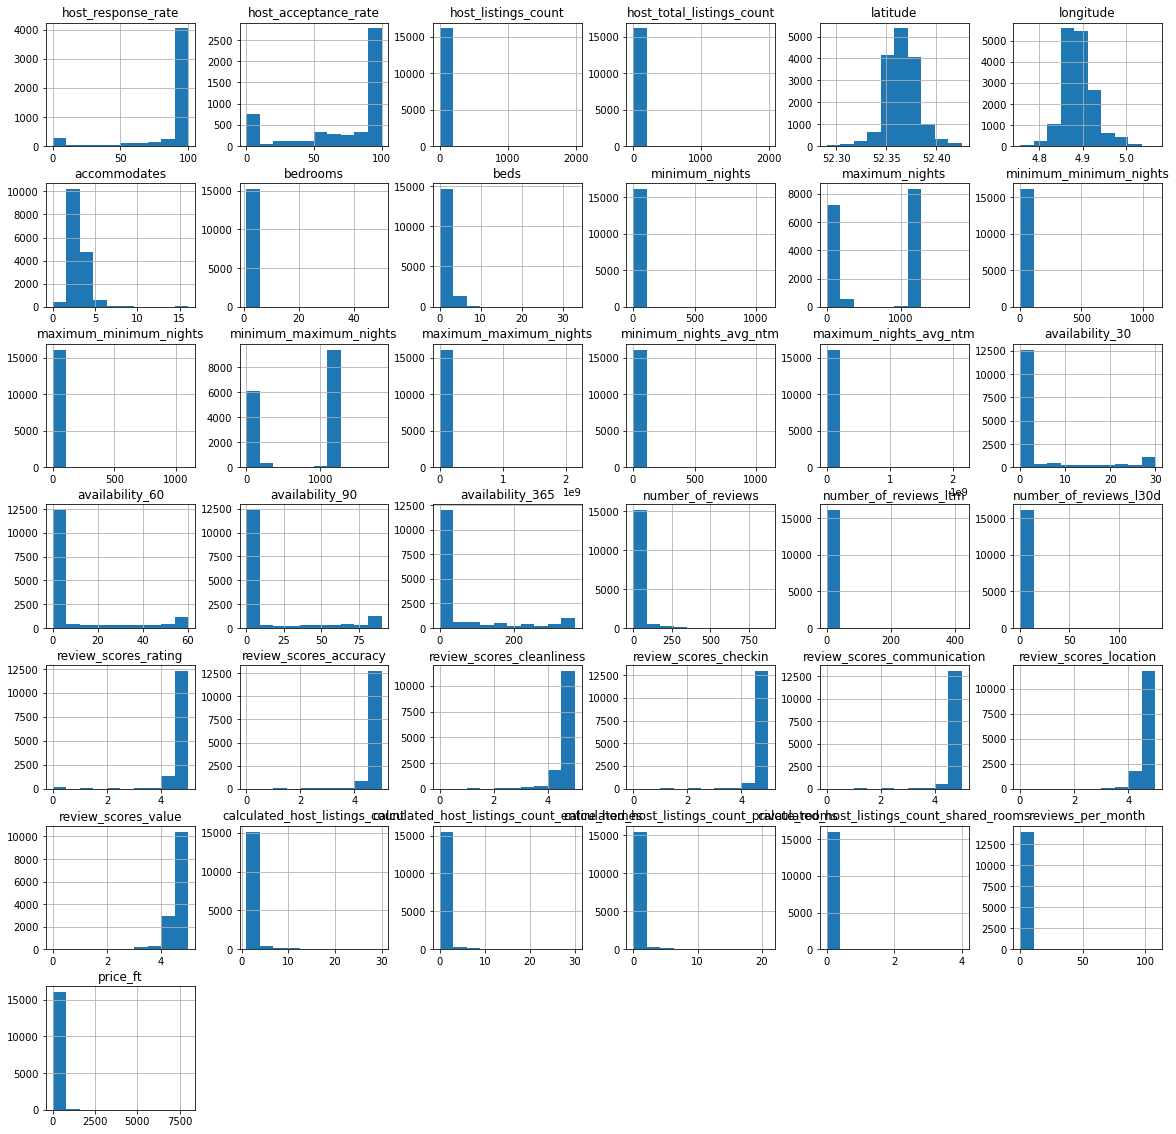

In [13]:
# Plotting numerical variables to check distributions
plots = df[num_cols].hist(figsize=(20,20))

In [14]:
plt.close('all')

Looking at the numerical variables:

- host_listings_count/host_total_listings_count: most of them are <100 which makes sense, since most people would list their own house as airbnb. It does have an outlier of 2000. With so many same values, maybe the column isnt that helpful. The two column are also probably highly correlated.
- accomodates: shows the data is skewed to the left, with most values between 1 and 6, with one outlier in the 16 range.
- bedrooms: shows the data is skewed to the left, with most values less than 10, with one outlier of 50. 
- similar story with beds as bedrooms.
- min_nights: most of the values are in the first bin, with a few above that. Few outliers, especially the >1000 nights. 
- max_nights: the max night has most values above 1000, which seems to be like a default value if the host doesnt type in max nights while listing the place
- similar story as min_nights for min_min_nights, min_max_nights, max_min_nights, max_max_nights and min_nights_avg_ntm. They all seem highly correlated with each other. 
- all the availability columns are highly skewed with most values less than 5
- number of review columns are also skewed and likely to be highly correlated

In [15]:
df2 = df.set_index('id')

----------------------------------------

----------------------------------

## Data Exploration

### Numerical Features

#### Price

<i> Question: </i> What is the overall distribution of price?

Answer: Prices range from 0 all the way up to 8000 dollars. There will be some cleaning done on the unhelpful prices. There are notable dropoffs in prices, 250 in the first one and 1000 in the second one.

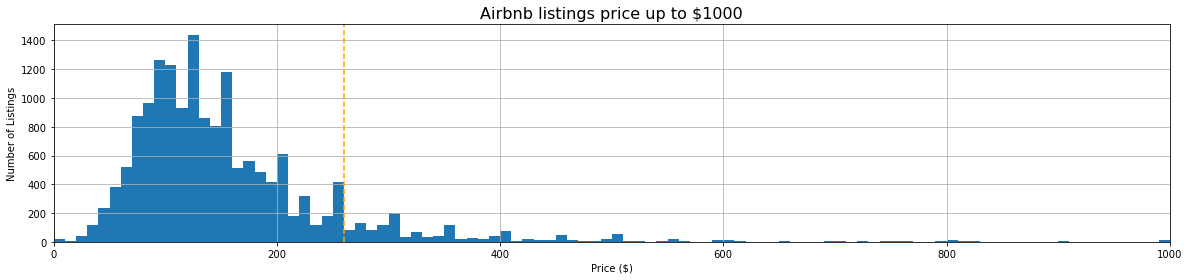

In [16]:
# Checking the distribution of price 
plt.figure(figsize=(20,4))
df2['price_ft'].hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(260, color='orange', linestyle='--')
plt.title("Airbnb listings price up to $1000", fontsize=16)
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.show()

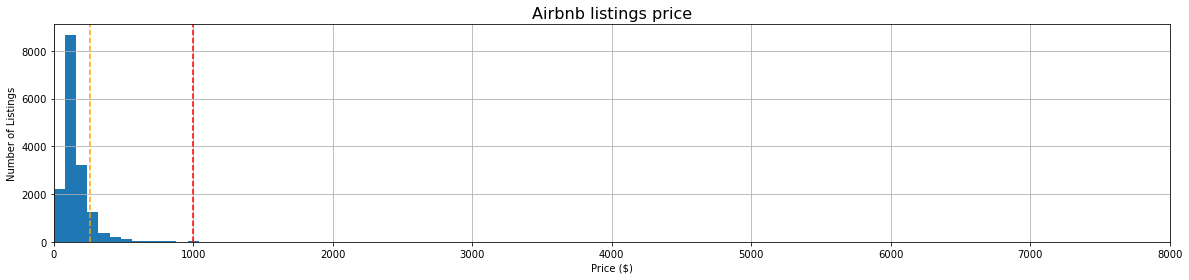

In [17]:
# Checking the distribution of price 
plt.figure(figsize=(20,4))
df2['price_ft'].hist(bins=100, range=(0,max(df2['price_ft'])))
plt.margins(x=0)
plt.axvline(260, color='orange', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Airbnb listings price", fontsize=16)
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.show()

In [18]:
df2['price_ft'].describe()

count    16116.000000
mean       156.908476
std        173.418216
min          0.000000
25%         96.000000
50%        130.000000
75%        180.000000
max       8000.000000
Name: price_ft, dtype: float64

In [19]:
# Winsorizing price to the 90th percentile 
l_qt = df2.price_ft.quantile(0.01)
u_qt = df2.price_ft.quantile(0.99)

df2['price_ft'] = df2['price_ft'].clip(lower=l_qt, upper=u_qt)

We could have dropped the rows where the data was unusual like prices greater than 8000 or 0; however we chose to keep those since they may be valid data points. 

<AxesSubplot:>

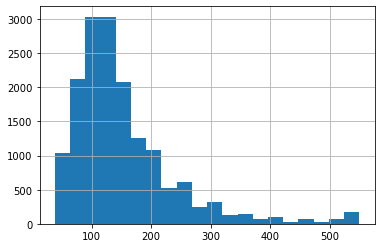

In [20]:
df2.price_ft.hist(bins=20)

--------------

#### Accommodation, Beds, Bedrooms and Bathrooms

<i> Question: </i> On average, how many people are accommodated in airbnb's in Amsterdam and how do their price vary? How many beds, bedrooms and bathrooms are part of the rental? 

<i> Answer: </i> Most listings accommodates 2-4 people, with a few going up to 16. However, there are 12 listings that accommodate zero people, which must be an error. They are also the ones where the price is equal to zero. 

The median price on generally follows the trend of increasing as no of people increases with 3 exceptions: 9,13 and 15. There are only one listing in each of those and can be deleted. 

Most listings have one bedroom and one bed shared between two people. There are a few listings with zero beds that we might need to clean up.

<AxesSubplot:xlabel='accommodates', ylabel='price_ft'>

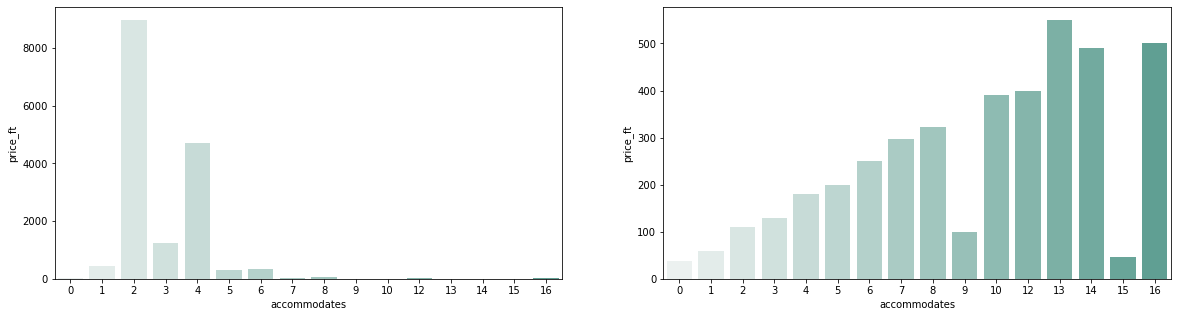

In [21]:
plt.rc('figure', figsize=(20,5))

median_price = df2.groupby(['accommodates'], as_index=False).agg({'price_ft': 'median'})
count_price = df2.groupby(['accommodates'], as_index=False).agg({'price_ft': 'count'})

fig, axs = plt.subplots(nrows=1, ncols=2)

sns.barplot(x='accommodates', y='price_ft' ,data=count_price, ax=axs[0], palette = 'light:#5A9')
sns.barplot(x='accommodates', y='price_ft', data=median_price, ax=axs[1], palette = 'light:#5A9')

Deleting rows where accommodates is 0,9,13 and 15. For the rows that is zero, that is definitely an error, as for 9,13 and 15 the price might have been incorrectly added. 

In [22]:
accommodates = median_price.merge(count_price, left_on='accommodates', right_on='accommodates')
print(accommodates[accommodates['accommodates'].isin([9,13,15])])

print(accommodates[accommodates['accommodates']==0])

    accommodates  price_ft_x  price_ft_y
9              9        99.0           1
12            13       550.0           1
14            15        46.0           1
   accommodates  price_ft_x  price_ft_y
0             0        38.0          12


In [23]:
# Deleting rows as mentioned above 
print(df2.shape)

df2 = df2[df2['accommodates']>0]
df2 = df2[~df2['accommodates'].isin([9,13,15])]

print(df2.shape)

(16116, 74)
(16101, 74)


In [24]:
# Converting bathroom_text column into numerical column
df2.bathrooms_text.value_counts()

1 bath               9246
1.5 baths            3196
1 shared bath        1005
1 private bath       1003
2 baths               717
1.5 shared baths      392
2.5 baths             209
3 baths                93
0 baths                39
Half-bath              34
3.5 baths              34
Shared half-bath       33
2 shared baths         28
0 shared baths         12
4 baths                10
3 shared baths          9
3.5 shared baths        7
Private half-bath       6
4 shared baths          5
8 baths                 3
5 baths                 3
2.5 shared baths        3
6 baths                 2
5.5 baths               1
13 baths                1
4.5 baths               1
Name: bathrooms_text, dtype: int64

In [25]:
def bathroom_func(x):
    if x == "Half-bath":
        x = 0.5
    elif x == "Shared":
        x = 0.5
    elif x == "Private":
        x = 1
    else:
        x
    
    return float(x)

df2.bathrooms_text.fillna('0', inplace=True)
df2[['bathrooms', 'bathrooms_text']] = df2.bathrooms_text.str.split(" ", n=1, expand=True)
df2['bathrooms'] = df2['bathrooms'].apply(lambda x: bathroom_func(x))


In [26]:
df2.drop('bathrooms_text', axis=1, inplace=True)

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

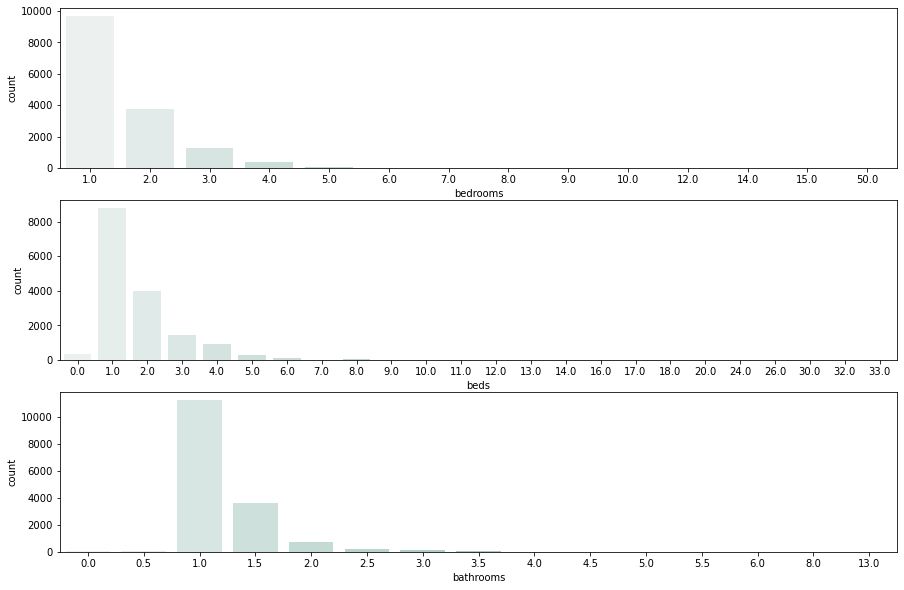

In [27]:
plt.rc('figure', figsize=(15,10))

fig, axs = plt.subplots(nrows=3, ncols=1)

sns.countplot(x='bedrooms', data=df2, ax=axs[0], palette = 'light:#5A9')
sns.countplot(x='beds', data=df2, ax=axs[1], palette = 'light:#5A9')
sns.countplot(x='bathrooms', data=df2, ax=axs[2], palette = 'light:#5A9')

Focusing on rows where beds is equal to 0. We want to update these since there cannot be airbnbs where there are no beds. We are using the average number of beds for every accommodation-bedroom combination to replace these values. 

In [28]:
df2[df2['beds']==0].head()

listing_url       scrape_id last_scraped  \
id                                                                         
247805  https://www.airbnb.com/rooms/247805  20210907032724   2021-09-07   
307497  https://www.airbnb.com/rooms/307497  20210907032724   2021-09-07   
528022  https://www.airbnb.com/rooms/528022  20210907032724   2021-09-07   
537321  https://www.airbnb.com/rooms/537321  20210907032724   2021-09-07   
590681  https://www.airbnb.com/rooms/590681  20210907032724   2021-09-07   

                                                  name  \
id                                                       
247805             Bellavista, central,with canal view   
307497           Sailing ship group stays in Amsterdam   
528022                                  Somewhere Else   
537321              Comfortable and pleasant apartment   
590681  Beautiful large family garden house Vondelpark   

                                              description  \
id                                                          
247805  Our lovely studio apartment is located near th...   
307497  Welcome on board of our historical sailing shi...   
528022  Highlights<br />*Located only 5 minutes from C...   
537321  Nice Amsterdam apartment where you can relax a...   
590681  Beautiful, large  (145 m2) newly renovated 2 s...   

                                    neighborhood_overview  \
id                                                          
247805                                                NaN   
307497                                          Amsterdam   
528022                                                NaN   
537321                                                NaN   
590681  The Amstelveense weg is around the corner and ...   

                                              picture_url  host_id  \
id                                                                   
247805  https://a0.muscache.com/pictures/0fe2ec6c-45c3...  1298735   
307497  https://a0.muscache.com/pictures/4767012/c9537...  1582128   
528022  https://a0.muscache.com/pictures/bf6fa79c-5863...  2594559   
537321  https://a0.muscache.com/pictures/3395b740-a55e...  2639261   
590681  https://a0.muscache.com/pictures/7377847/0b0da...  2914846   

                                         host_url host_name  host_since  \
id                                                                        
247805  https://www.airbnb.com/users/show/1298735  Carolien  2011-10-16   
307497  https://www.airbnb.com/users/show/1582128      Jorn  2012-01-08   
528022  https://www.airbnb.com/users/show/2594559       Els  2012-06-10   
537321  https://www.airbnb.com/users/show/2639261      Vera  2012-06-14   
590681  https://www.airbnb.com/users/show/2914846     Lotte  2012-07-12   

                                    host_location  \
id                                                  
247805  Amsterdam, Noord-Holland, The Netherlands   
307497  Amsterdam, Noord-Holland, The Netherlands   
528022      Amsterdam, North Holland, Netherlands   
537321      Amsterdam, North Holland, Netherlands   
590681  Amsterdam, Noord-Holland, The Netherlands   

                                               host_about  host_response_time  \
id                                                                              
247805  Amsterdam is a great and very beautiful city, ...  within a few hours   
307497  Living and working  in  Amsterdam. Have shop i...        within a day   
528022                                                NaN      within an hour   
537321  I'm Vera, 33 years old, live in Amsterdam toge...  a few days or more   
590681  I am From Amsterdam (born & raised :))\nI love...                 NaN   

        host_response_rate  host_acceptance_rate host_is_superhost  \
id                                                                   
247805               100.0                 100.0                 t   
307497               100.0                  54.0                 t   

In [29]:
# Looking at average number of beds that certain number of accommodations and bedrooms combinations have to change the zero beds

beds = pd.pivot_table(df2, index='accommodates', columns='bedrooms', values = 'beds', aggfunc=np.mean)
beds = beds.apply(np.floor)

beds

bedrooms      1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  \
accommodates                                                               
1              1.0   2.0   4.0   1.0   NaN   NaN   NaN   1.0   NaN   NaN   
2              1.0   1.0   2.0   8.0   NaN   1.0   NaN   NaN   NaN   NaN   
3              1.0   2.0   2.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4              2.0   2.0   3.0   4.0   6.0  10.0   NaN   NaN   NaN   NaN   
5              3.0   3.0   3.0   4.0   4.0   NaN   NaN   NaN   NaN   NaN   
6              2.0   3.0   3.0   4.0   5.0   NaN   NaN   NaN   NaN   NaN   
7              NaN   3.0   4.0   5.0   6.0   NaN   NaN   NaN   NaN   NaN   
8              4.0   7.0   5.0   5.0   6.0   NaN   NaN   NaN   NaN   NaN   
10             8.0   NaN   NaN   NaN   6.0   NaN   NaN   NaN   NaN   NaN   
12            12.0  13.0   9.0  12.0  10.0  11.0   NaN   NaN   NaN  24.0   
14             NaN   NaN   NaN  14.0   NaN  16.0  14.0   NaN   NaN   NaN   
16            18.0   NaN  20.0  14.0  13.0  16.0   NaN  19.0  24.0  18.0   

bedrooms      12.0  14.0  15.0  50.0  
accommodates                          
1              NaN   NaN   NaN   NaN  
2              NaN   NaN   NaN   NaN  
3              NaN   NaN   NaN   NaN  
4              NaN   NaN   NaN   NaN  
5              NaN   NaN   NaN   NaN  
6              NaN   NaN   NaN   NaN  
7              NaN   NaN   NaN   NaN  
8              NaN   NaN   NaN   NaN  
10             NaN   NaN   NaN   NaN  
12             NaN   NaN   NaN   NaN  
14             NaN   NaN   NaN   NaN  
16            31.0  26.0  16.0   2.0

In [30]:
# converting zero beds to NA and then filling the median value 
df2.loc[df2['beds']==0, 'beds'] = np.nan
df2['beds'] = df2.groupby(['accommodates', 'bedrooms'])['beds'].apply(lambda x: x.fillna(x.median()))
df2['beds'] = df2['beds'].apply(lambda x: np.floor(x))

df2.head()

listing_url       scrape_id last_scraped  \
id                                                                       
2818    https://www.airbnb.com/rooms/2818  20210907032724   2021-09-07   
20168  https://www.airbnb.com/rooms/20168  20210907032724   2021-09-07   
25428  https://www.airbnb.com/rooms/25428  20210907032724   2021-09-07   
27886  https://www.airbnb.com/rooms/27886  20210907032724   2021-09-07   
28871  https://www.airbnb.com/rooms/28871  20210907032724   2021-09-08   

                                                    name  \
id                                                         
2818            Quiet Garden View Room & Super Fast WiFi   
20168       Studio with private bathroom in the centre 1   
25428  Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.   
27886  Romantic, stylish B&B houseboat in canal district   
28871                            Comfortable double room   

                                             description  \
id                                                         
2818   Quiet Garden View Room & Super Fast WiFi<br />...   
20168  17th century Dutch townhouse in the heart of t...   
25428  Lovely apt in Centre ( lift & fireplace) near ...   
27886  Stylish and romantic houseboat on fantastic hi...   
28871  <b>The space</b><br />In a monumental house ri...   

                                   neighborhood_overview  \
id                                                         
2818   Indische Buurt ("Indies Neighborhood") is a ne...   
20168  Located just in between famous central canals....   
25428                                                NaN   
27886         Central, quiet, safe, clean and beautiful.   
28871       Flower market , Leidseplein , Rembrantsplein   

                                             picture_url  host_id  \
id                                                                  
2818   https://a0.muscache.com/pictures/10272854/8dcc...     3159   
20168  https://a0.muscache.com/pictures/69979628/fd6a...    59484   
25428  https://a0.muscache.com/pictures/138431/7079a9...    56142   
27886  https://a0.muscache.com/pictures/02c2da9d-660e...    97647   
28871  https://a0.muscache.com/pictures/160889/362340...   124245   

                                       host_url  host_name  host_since  \
id                                                                       
2818     https://www.airbnb.com/users/show/3159     Daniel  2008-09-24   
20168   https://www.airbnb.com/users/show/59484  Alexander  2009-12-02   
25428   https://www.airbnb.com/users/show/56142       Joan  2009-11-20   
27886   https://www.airbnb.com/users/show/97647       Flip  2010-03-23   
28871  https://www.airbnb.com/users/show/124245      Edwin  2010-05-13   

                                   host_location  \
id                                                 
2818   Amsterdam, Noord-Holland, The Netherlands   
20168  Amsterdam, Noord-Holland, The Netherlands   
25428          New York, New York, United States   
27886  Amsterdam, Noord-Holland, The Netherlands   
28871  Amsterdam, Noord-Holland, The Netherlands   

                                              host_about host_response_time  \
id                                                                            
2818   Upon arriving in Amsterdam, one can imagine as...     within an hour   
20168                  + (Phone number hidden by Airbnb)     within an hour   
25428  We are a retired couple who live in NYC, and h...                NaN   
27886  Marjan works in "eye" the dutch filmmuseum, an...     within an hour   
28871                                                 Hi     within an hour   

       host_response_rate  host_acceptance_rate host_is_superhost  \
id                                                                  
2818                100.0                 100.0                 t   
20168               100.0                 100.0                 f   
25428                 NaN                   0.0   

-----------------------------------------------

#### Host Listings Count/Host Total Listings Count 

<i> Question: </i> how many listings do hosts have on average? 

Answer: On average, hosts have about 2 listings and the median is 1. Around 68% of the listings are from hosts with one listing.

In [31]:
# Firstly the variables seem highly correlated and want to check that first

vars = ['host_listings_count', 'host_total_listings_count','calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms']
df2[vars].corr()

host_listings_count  \
host_listings_count                                      1.000000   
host_total_listings_count                                1.000000   
calculated_host_listings_count                           0.115964   
calculated_host_listings_count_entire_homes              0.104955   
calculated_host_listings_count_private_rooms             0.038877   
calculated_host_listings_count_shared_rooms              0.008890   

                                              host_total_listings_count  \
host_listings_count                                            1.000000   
host_total_listings_count                                      1.000000   
calculated_host_listings_count                                 0.115964   
calculated_host_listings_count_entire_homes                    0.104955   
calculated_host_listings_count_private_rooms                   0.038877   
calculated_host_listings_count_shared_rooms                    0.008890   

                                              calculated_host_listings_count  \
host_listings_count                                                 0.115964   
host_total_listings_count                                           0.115964   
calculated_host_listings_count                                      1.000000   
calculated_host_listings_count_entire_homes                         0.712594   
calculated_host_listings_count_private_rooms                        0.551309   
calculated_host_listings_count_shared_rooms                         0.144310   

                                              calculated_host_listings_count_entire_homes  \
host_listings_count                                                              0.104955   
host_total_listings_count                                                        0.104955   
calculated_host_listings_count                                                   0.712594   
calculated_host_listings_count_entire_homes                                      1.000000   
calculated_host_listings_count_private_rooms                                    -0.117549   
calculated_host_listings_count_shared_rooms                                      0.006231   

                                              calculated_host_listings_count_private_rooms  \
host_listings_count                                                               0.038877   
host_total_listings_count                                                         0.038877   
calculated_host_listings_count                                                    0.551309   
calculated_host_listings_count_entire_homes                                      -0.117549   
calculated_host_listings_count_private_rooms                                      1.000000   
calculated_host_listings_count_shared_rooms                                       0.129363   

                                              calculated_host_listings_count_shared_rooms  
host_listings_count                                                              0.008890  
host_total_listings_count                                                        0.008890  
calculated_host_listings_count                                                   0.144310  
calculated_host_listings_count_entire_homes                                      0.006231  
calculated_host_listings_count_private_rooms                                     0.129363  
calculated_host_listings_count_shared_rooms                                      1.000000

There is a 100% relationship between the host_listings_count and host_total_listings_count. We can delete one and focus on the other. 
For this analysis, I will drop host_total_listings_counts

There is also a strong relationship between calculated_host_listings_count with entire_homes and private_homes. I will drop those two columns as well. 

In [32]:
df2 = df2.drop(columns=['host_total_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms'])

In [33]:
print("Median number of listings per host:", int(df2.host_listings_count.median()))
print("Mean number of listings per host:", int(round(df2.host_listings_count.mean())))
print(f"{int(round(100*len(df2[df2.host_listings_count == 1])/len(df2)))}% of listings are from hosts with one listing.")

Median number of listings per host: 1
Mean number of listings per host: 2
68% of listings are from hosts with one listing.


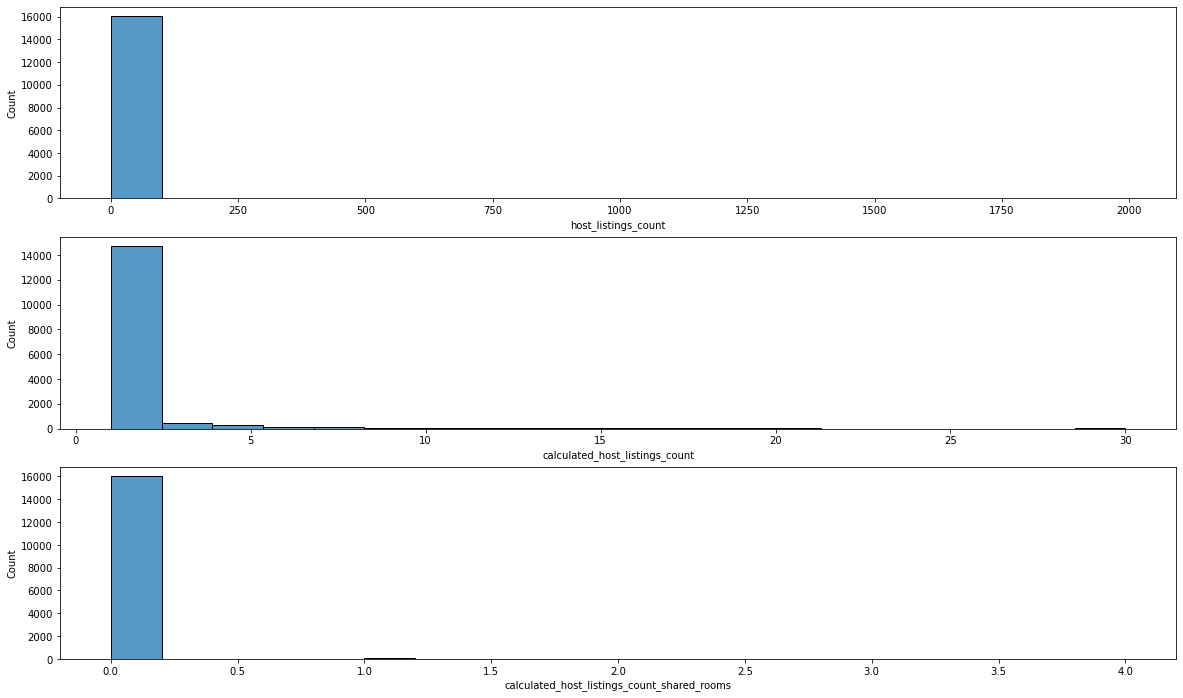

In [34]:
# Visualizing the variables 
cols = ['host_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_shared_rooms']

plt.rc('figure', figsize=(20,12))
fig, axs = plt.subplots(nrows=3,ncols=1)

axis = 0
for column in cols:
    sns.histplot(x=column, data=df2, ax=axs[axis], bins=20)
    axis += 1

plt.show()

In [35]:
df2[cols].describe()

host_listings_count  calculated_host_listings_count  \
count         16096.000000                    16101.000000   
mean              2.024354                        1.637352   
std              23.355478                        2.403097   
min               0.000000                        1.000000   
25%               1.000000                        1.000000   
50%               1.000000                        1.000000   
75%               1.000000                        1.000000   
max            1992.000000                       30.000000   

       calculated_host_listings_count_shared_rooms  
count                                 16101.000000  
mean                                      0.008074  
std                                       0.134891  
min                                       0.000000  
25%                                       0.000000  
50%                                       0.000000  
75%                                       0.000000  
max                                       4.000000

In [36]:
# Taking a closer look at the listing with 1992 host_listing_count 

df2.loc[df2['host_listings_count']==1992,:]

listing_url       scrape_id last_scraped  \
id                                                                             
45761390  https://www.airbnb.com/rooms/45761390  20210907032724   2021-09-07   
47504684  https://www.airbnb.com/rooms/47504684  20210907032724   2021-09-08   

                                                   name  \
id                                                        
45761390  1 bedroom 15 min by tram to Amsterdam centre!   
47504684              Houseboat in Amsterdam Old Center   

                                                description  \
id                                                            
45761390  Nice flat in the ground floor in the west area...   
47504684  Your houseboat is moored with its South view o...   

         neighborhood_overview  \
id                               
45761390                   NaN   
47504684                   NaN   

                                                picture_url    host_id  \
id                                                                       
45761390  https://a0.muscache.com/pictures/d2d1fdf5-efe9...  310835509   
47504684  https://a0.muscache.com/pictures/prohost-api/H...  310835509   

                                             host_url   host_name  host_since  \
id                                                                              
45761390  https://www.airbnb.com/users/show/310835509  TravelNest  2019-11-20   
47504684  https://www.airbnb.com/users/show/310835509  TravelNest  2019-11-20   

                                host_location  \
id                                              
45761390  Edinburgh, Scotland, United Kingdom   
47504684  Edinburgh, Scotland, United Kingdom   

                                                 host_about  \
id                                                            
45761390  Founded in 2018, TravelNest advertises vacatio...   
47504684  Founded in 2018, TravelNest advertises vacatio...   

         host_response_time  host_response_rate  host_acceptance_rate  \
id                                                                      
45761390     within an hour                92.0                  99.0   
47504684     within an hour                92.0                  99.0   

         host_is_superhost                                 host_thumbnail_url  \
id                                                                              
45761390                 f  https://a0.muscache.com/im/pictures/user/635f5...   
47504684                 f  https://a0.muscache.com/im/pictures/user/635f5...   

                                           host_picture_url  \
id                                                            
45761390  https://a0.muscache.com/im/pictures/user/635f5...   
47504684  https://a0.muscache.com/im/pictures/user/635f5...   

         host_neighbourhood  host_listings_count  host_verifications  \
id                                                                     
45761390      D.H.A Phase 6               1992.0  ['email', 'phone']   
47504684      D.H.A Phase 6               1992.0  ['email', 'phone']   

         host_has_profile_pic host_identity_verified neighbourhood  \
id                                                                   
45761390                    t                      t           NaN   
47504684                    t                      t           NaN   

         neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  \
id                                                                        
45761390          Bos en Lommer                           NaN  52.37628   
47504684           Centrum-Oost                           NaN  52.37100   

          longitude            property_type        room_type  accommodates  \
id                                                                            
45761390    4.84923       Entire rental unit  Entire home/apt             4   
47504684    4.89983  Entire residenti

This host is a group that manages multiple properties, which is why the host listings count is 1992. Since its a valid row, we will keep them as it is. 

-----------------------------------------------

#### Minimum and Maximum Nights

In [37]:
# Firstly there are many minimum and maximum night variables. 
# Checking to see how coorelated they are 

vars = ['minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights'
        ,'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']

df2[vars].corr()

minimum_nights  maximum_nights  \
minimum_nights                1.000000        0.002453   
maximum_nights                0.002453        1.000000   
minimum_minimum_nights        0.999589        0.002539   
maximum_minimum_nights        0.997166        0.003696   
minimum_maximum_nights        0.002218        0.827671   
maximum_maximum_nights       -0.001589        0.010666   
minimum_nights_avg_ntm        0.999416        0.002851   
maximum_nights_avg_ntm       -0.001589        0.010666   

                        minimum_minimum_nights  maximum_minimum_nights  \
minimum_nights                        0.999589                0.997166   
maximum_nights                        0.002539                0.003696   
minimum_minimum_nights                1.000000                0.997126   
maximum_minimum_nights                0.997126                1.000000   
minimum_maximum_nights                0.001821                0.002483   
maximum_maximum_nights               -0.001569               -0.000610   
minimum_nights_avg_ntm                0.999486                0.998740   
maximum_nights_avg_ntm               -0.001569               -0.000610   

                        minimum_maximum_nights  maximum_maximum_nights  \
minimum_nights                        0.002218               -0.001589   
maximum_nights                        0.827671                0.010666   
minimum_minimum_nights                0.001821               -0.001569   
maximum_minimum_nights                0.002483               -0.000610   
minimum_maximum_nights                1.000000                0.009226   
maximum_maximum_nights                0.009226                1.000000   
minimum_nights_avg_ntm                0.002387               -0.001607   
maximum_nights_avg_ntm                0.009226                1.000000   

                        minimum_nights_avg_ntm  maximum_nights_avg_ntm  
minimum_nights                        0.999416               -0.001589  
maximum_nights                        0.002851                0.010666  
minimum_minimum_nights                0.999486               -0.001569  
maximum_minimum_nights                0.998740               -0.000610  
minimum_maximum_nights                0.002387                0.009226  
maximum_maximum_nights               -0.001607                1.000000  
minimum_nights_avg_ntm                1.000000               -0.001607  
maximum_nights_avg_ntm               -0.001607                1.000000

There is strong coorelation between multiple variables. There are some differences amongst the columns, which is why I would go with minimum_nights and maximum_nights. Presumably, the minimum_minimum_night is referring to the fact that minimum nights can vary along the year. 

In [38]:
df2 = df2.drop(columns=['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights'
        ,'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm'])

In [39]:
df2[['minimum_nights', 'maximum_nights']].describe()

minimum_nights  maximum_nights
count    16101.000000    16101.000000
mean         3.993789      608.386808
std         20.997047      540.809122
min          1.000000        1.000000
25%          2.000000       21.000000
50%          2.000000     1125.000000
75%          3.000000     1125.000000
max       1100.000000     1825.000000

<AxesSubplot:xlabel='maximum_nights', ylabel='Count'>

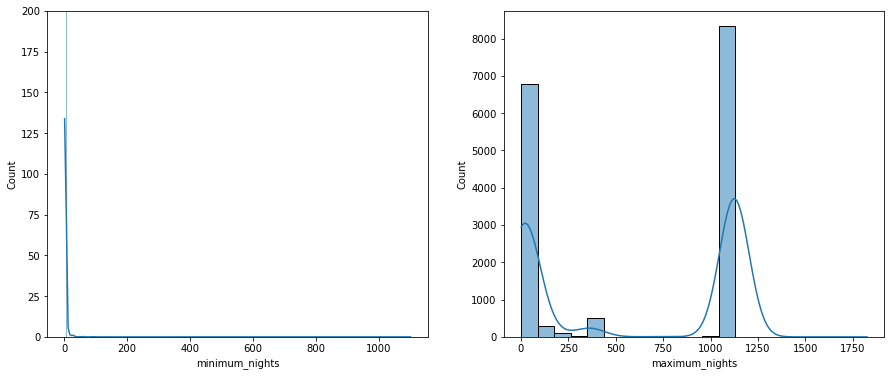

In [40]:
plt.rc('figure', figsize=(15,6))
fig, axs = plt.subplots(nrows=1, ncols=2)

sns.histplot(x='minimum_nights', data=df2, ax=axs[0], kde=True)
axs[0].set_ylim(top=200)
sns.histplot(x='maximum_nights', data=df2, ax=axs[1], kde=True)

Most listings have minimum number of nights less than 5, however, there are listing(s) that have min no of nights as high as 1100. Max nights on the other hand are either really low or really high!

In [41]:
# dropping row with minimum nights = 1100 

df2 = df2.loc[df2['minimum_nights']!=1100,:]

In [42]:
room_type = df2.groupby(['room_type'], as_index=False).agg({'minimum_nights': 'mean', 'maximum_nights': 'mean'})

room_type

room_type  minimum_nights  maximum_nights
0  Entire home/apt        4.165882      605.243517
1       Hotel room        1.445652      882.880435
2     Private room        3.141858      612.920186
3      Shared room        1.761905      562.238095

In [43]:
# What type of property do those min and max nights correspond to

property_nights = df2.groupby(['property_type'],as_index=False).agg({'minimum_nights': 'mean', 'maximum_nights': 'mean', 'host_id': 'count'})

property_nights = property_nights.sort_values(by='host_id', ascending=False)

property_nights_df = pd.DataFrame(columns={'property_type', 'minimum_nights', 'maximum_nights'})

property_type = []
minimum_nights = []
maximum_nights = []
other_min = []
other_max = []

for i in range(len(property_nights)):
    if property_nights.iloc[i,3] > 100:
        property_type.append(property_nights.iloc[i,0])
        minimum_nights.append(property_nights.iloc[i,1])
        maximum_nights.append(property_nights.iloc[i,2])
    else:
        other_min.append(property_nights.iloc[i,1])
        other_max.append(property_nights.iloc[i,2])

property_nights_df['property_type'] = property_type
property_nights_df['minimum_nights'] = minimum_nights
property_nights_df['maximum_nights'] = maximum_nights

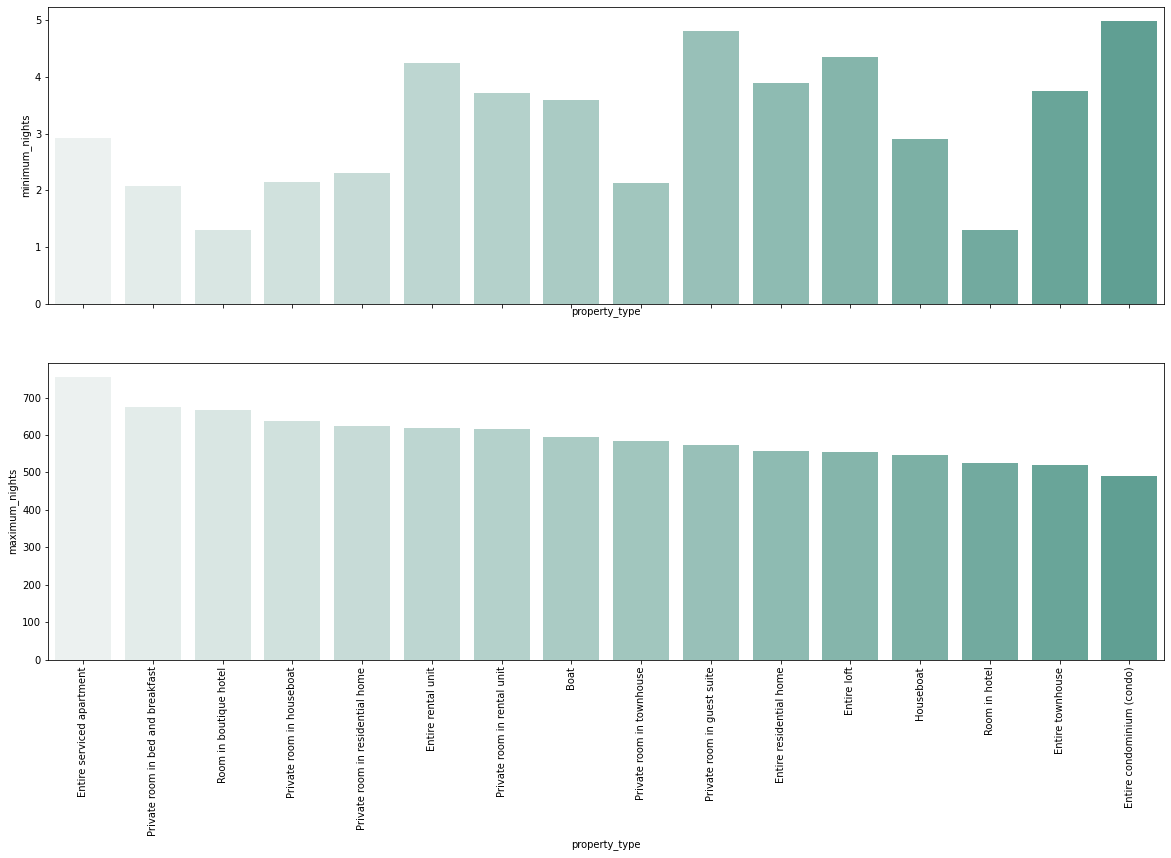

In [44]:
property_nights_df = property_nights_df.sort_values(by='maximum_nights', ascending=False)
plt.rc('figure', figsize=(20,12))

fig, axs = plt.subplots(nrows=2, ncols=1, sharex = True)

sns.barplot(x='property_type', y='minimum_nights', data=property_nights_df, ax=axs[0], palette='light:#5A9')
sns.barplot(x='property_type', y='maximum_nights', data=property_nights_df, ax=axs[1], palette="light:#5A9")

plt.xticks(rotation=90)
plt.show()

-----------------------------------

#### Availibility 

In [45]:
cols = ['availability_30', 'availability_60', 'availability_90', 'availability_365', 'price_ft']
df2[cols].corr()

availability_30  availability_60  availability_90  \
availability_30          1.000000         0.966421         0.931954   
availability_60          0.966421         1.000000         0.984874   
availability_90          0.931954         0.984874         1.000000   
availability_365         0.704316         0.754631         0.784626   
price_ft                 0.162674         0.165213         0.159820   

                  availability_365  price_ft  
availability_30           0.704316  0.162674  
availability_60           0.754631  0.165213  
availability_90           0.784626  0.159820  
availability_365          1.000000  0.151991  
price_ft                  0.151991  1.000000

Since there is a high coorelation between these variables I will drop availability 60,90 and 365 columns

In [46]:
df2 = df2.drop(columns=['availability_60', 'availability_90', 'availability_365'])

--------------------------------------

#### First and Last Reviews

About 2000 listings havent had a review written for them. Since that is a significant number of rows, we cant just delete them, as reviews are an important information. Since these missing values arent truly NAN's, they are probably listings that are new and havent had an reviews, we can convert them to categorical.

In [47]:
df2['first_review'] = pd.to_datetime(df2['first_review'])
df2['calendar_last_scraped'] = pd.to_datetime(df2['calendar_last_scraped'])
# calculating the number of days between the first review and the date the data was scraped
df2['time_since_first_review'] = (df2['calendar_last_scraped'] - df2['first_review']).astype('timedelta64[D]')

<AxesSubplot:xlabel='time_since_first_review', ylabel='Count'>

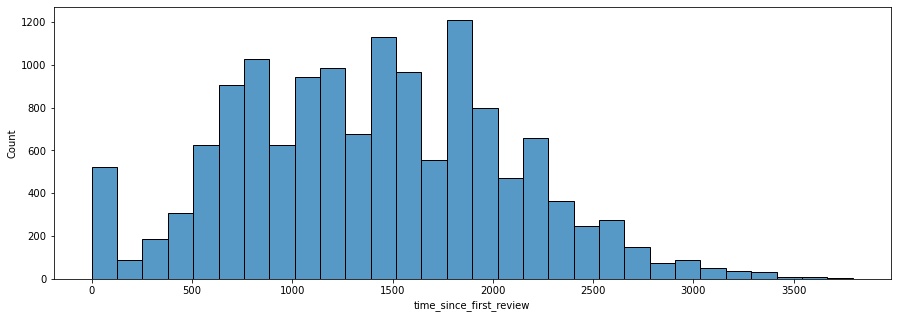

In [48]:
# Distribution of the number of days since first review
plt.rc('figure', figsize=(15,5))

sns.histplot(x='time_since_first_review', data=df2, bins=30)

In [49]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df2[col] = pd.cut(df2[col], bins=bins, labels=labels, include_lowest=True)
    df2[col] = df2[col].astype('str')
    df2[col].fillna(na_label, inplace=True)

In [50]:
# Binning time since first review 
bin_column('time_since_first_review',
          bins=[0,182,365,730,1460,max(df2.time_since_first_review)],
          labels=['0-6 months',
                  '6-12 months',
                  '1-2 years',
                  ' 2-3 years',
                  '4+ years'],
          na_label='no reviews')

Same process for last_review

In [51]:
df2.last_review = pd.to_datetime(df2.last_review)

df2['time_since_last_review'] = (df2['calendar_last_scraped'] - df2['last_review']).astype('timedelta64[D]')

<AxesSubplot:xlabel='time_since_last_review', ylabel='Count'>

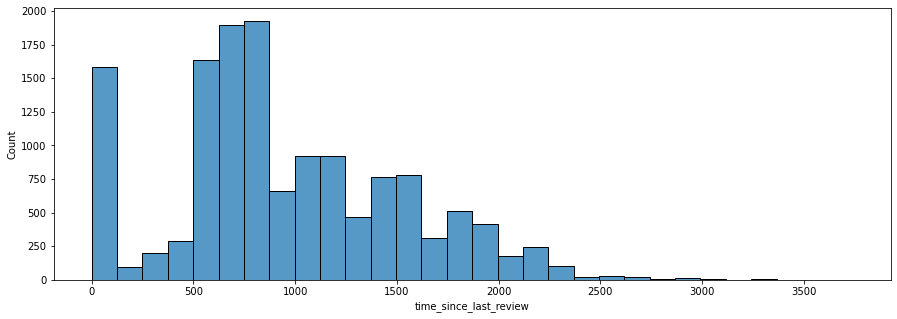

In [52]:
# Distribution of the number of days since last review
plt.rc('figure', figsize=(15,5))

sns.histplot(x='time_since_last_review', data=df2, bins=30)

In [53]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df2.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [54]:
df2.drop('last_review', axis=1, inplace=True)

<i> Question: </i> How long have listings been on site, and how many listings have been reviewed recently

<i> Answer: </i> According to the data, most listings have been on the site for quite some time. The highest category is the "4+ year" for the time since first review, which means over 6000 listings have been on site for at least 4 years. 

However, a significant number of listings have had their last reivew over a year ago. This is probably due to the fact that COVID had stopped international travel, and most of the airbnb's went empty during this period of time. 

<AxesSubplot:>

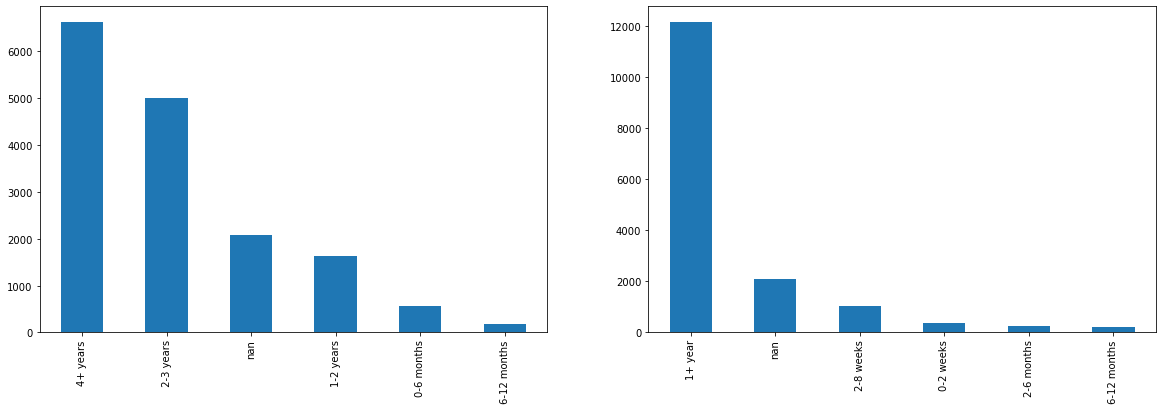

In [55]:
plt.rc('figure', figsize=(20,6))

fig, axs = plt.subplots(nrows=1, ncols=2)

df2['time_since_first_review'].value_counts().plot(kind='bar', ax=axs[0])
df2['time_since_last_review'].value_counts().plot(kind='bar', ax=axs[1])
   

 ------------------------

#### Review Ratings 

About 2000 listings havent had a review written for them. Since that is a significant number of rows, we cant just delete them, as reviews are an important information. Since these missing values arent truly NAN's, they are probably listings that are new and havent had an reviews, we can convert them to categorical.

Most listings have 5 out of 5 ratings, with a very few below 3

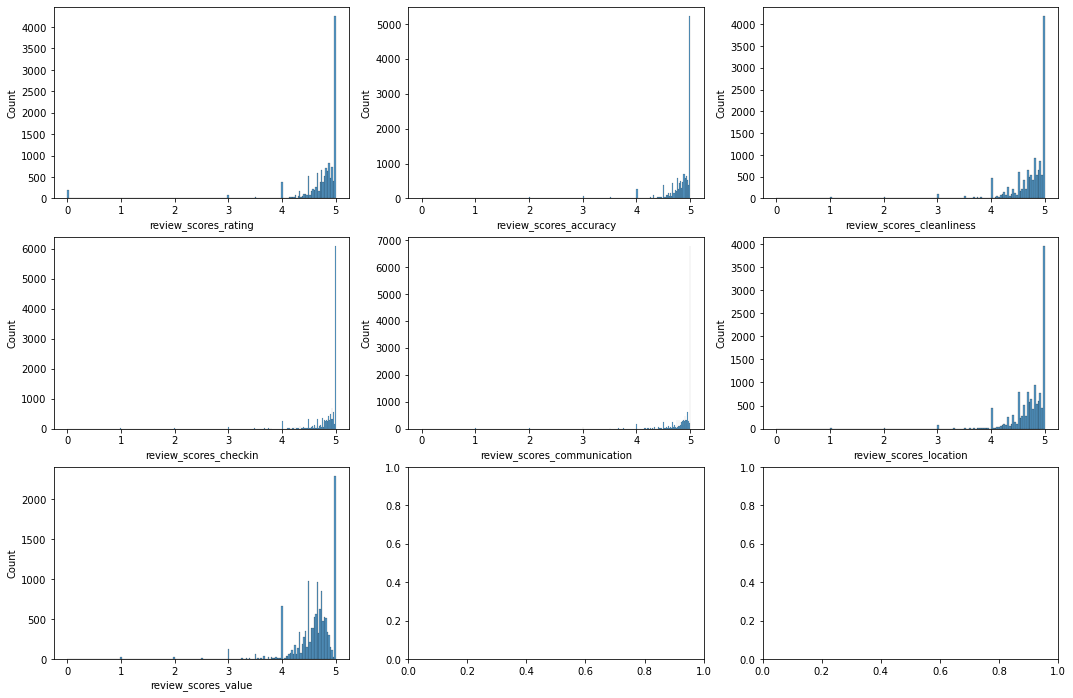

In [56]:
variables_names = list(df.columns[df.columns.str.startswith("review_scores") == True])

plt.rc('figure', figsize=(18,12))

fig, axs = plt.subplots(nrows=3, ncols=3)

for idx, col in enumerate(variables_names):
    ax = axs[int(idx/3), idx%3]
    sns.histplot(x=df2[col], data=df2, ax=ax)

fig.tight_layout;

In [57]:
# Binning review score columns
col_names = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
             'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
             'review_scores_value']

for i in col_names:
    bin_column(i,
               bins=[0,3,4,5],
               labels=['0-3',
                       '3-4',
                       '4-5'],
               na_label='no reviews')

--------------------------------------

#### Latitude and Longitude

In [58]:
# Calculating the distance between the city center and each location of the listings
from geopy.distance import great_circle 

def distance_from_center(lat, long):
    amsterdam = (52.3676, 4.9041)
    airbnb = (lat, long)
    return great_circle(amsterdam, airbnb).miles 

df2['dist_to_cent'] = df2.apply(lambda x: distance_from_center(x.latitude, x.longitude), axis=1)

<AxesSubplot:xlabel='dist_to_cent', ylabel='price_ft'>

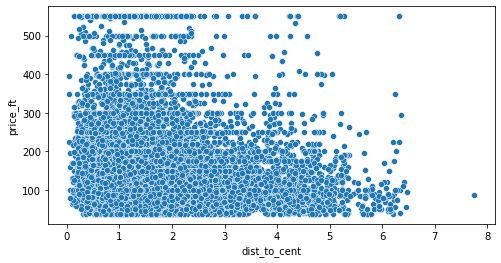

In [59]:
plt.rc('figure', figsize=(8,4))
sns.scatterplot(x='dist_to_cent', y='price_ft', data=df2)

#### Transportation Score

Using data provided by Amsterdam city website about transit stations locations
The goal is to give each listing a transportation score.

The methodology used here is as follows: using shapely point data, we would calculate the distance bewteen each tram/train station and the listing. Once we have those, we would calculate the top ten closest trams/train stations and take the average of it. Since we want closer stations to represent a better score, we would take an inverse of the average and scale it to a 0-1 value and multiply it by 100 to get the transportation score.

In [60]:
import geopandas as gpd 

transit = gpd.read_file('https://maps.amsterdam.nl/open_geodata/geojson_latlng.php?KAARTLAAG=TRAMMETRO_PUNTEN_2021&THEMA=trammetro')

transit.head()

Naam Modaliteit              Lijn  Lijn_select  \
0               Nieuwezijds Kolk       Tram  2 | 12 | 13 | 17  02|12|13|17   
1  Surinameplein / Curaçaostraat       Tram            1 | 17        01|17   
2             Johan Huizingalaan       Tram            1 | 17        01|17   
3                  Prinsengracht       Tram            2 | 12        02|12   
4                   Keizergracht       Tram            2 | 12        02|12   

   RADIUS                                   Label                  geometry  
0       5     2 | 12 | 13 | 17 - Nieuwezijds Kolk  POINT (52.37607 4.89334)  
1       5  1 | 17 - Surinameplein / Curaçaostraat  POINT (52.35838 4.85312)  
2       5             1 | 17 - Johan Huizingalaan  POINT (52.35782 4.82733)  
3       5                  2 | 12 - Prinsengracht  POINT (52.36502 4.88447)  
4       5                   2 | 12 - Keizergracht  POINT (52.36596 4.88645)

In [61]:
transit.rename(columns={'Naam':'Name', 'Modaliteit':'Mode_of_Transportation', 'Lijn': 'Line'}, inplace=True)

In [62]:
transit.drop('Lijn_select', axis=1, inplace=True)

In [63]:
transit['key'] = 1

In [64]:
from shapely.geometry import Point 
location_df = df2[['latitude', 'longitude']]
geometry = [Point(xy) for xy in zip(location_df['latitude'], location_df['longitude'])]
location_df = gpd.GeoDataFrame(location_df, geometry=geometry)
location_df['key'] = 1
location_df.head(1)

latitude  longitude                  geometry  key
id                                                      
2818  52.36435    4.94358  POINT (52.36435 4.94358)    1

In [65]:
transp = pd.merge(location_df, transit, on='key').drop('key',1)

C:\Users\priya\AppData\Local\Temp/ipykernel_11008/1873725783.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  transp = pd.merge(location_df, transit, on='key').drop('key',1)


In [66]:
# Calculating the distance between the location of the airbnb and train/tram stations
def distance(x,y):
    value = x.distance(y)
    return value

transp['distance'] = transp.apply(lambda x: distance(x.geometry_x, x.geometry_y), axis=1)

In [67]:
# Finding the top 10 closest train/tram stations and taking the average distance
transp_ten = transp.sort_values(by='distance', ascending=True).groupby(['latitude', 'longitude'], as_index=False).head(10)[['latitude','longitude','distance']]
transp_avg = transp_ten.groupby(['latitude', 'longitude']).agg({'distance':'mean'})
transp_avg['distance'] = 1/transp_avg['distance']

In [68]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
scaler.fit(transp_avg)
scaled = scaler.transform(transp_avg)

transp_avg['scaled_data'] = scaled
transp_avg['scaled_data'] = transp_avg['scaled_data']*100
transp_avg.reset_index(level=['latitude', 'longitude'], inplace=True)

In [69]:
df2 = df2.merge(transp_avg, how='inner', on=['latitude','longitude'])
df2.drop('distance', axis=1, inplace=True)
df2.rename(columns={'scaled_data':'transportation_score'}, inplace=True)

----------------------------

### Categorical Variables 

#### Host is Super Host 

<i> Question: </i> Does being a super host impact the price that is charged?

Answer: About 13% of hosts are superhosts. However, on average the price charged by superhosts is not that different than non superhosts

In [70]:
# There are 5 rows with missing super host values
df2[df2['host_is_superhost'].isnull()]

listing_url       scrape_id last_scraped  \
2333    https://www.airbnb.com/rooms/6163575  20210907032724   2021-09-07   
2407    https://www.airbnb.com/rooms/6345018  20210907032724   2021-09-07   
4059   https://www.airbnb.com/rooms/10227700  20210907032724   2021-09-07   
9390   https://www.airbnb.com/rooms/21892378  20210907032724   2021-09-07   
12167  https://www.airbnb.com/rooms/31380902  20210907032724   2021-09-07   

                                                   name  \
2333                 30m2 room in Amsterdam city center   
2407                             appartment with garden   
4059                                        Leuke Kamer   
9390                  Beautiful 17th century dyke house   
12167  Work from home - 2 bedroom apartment near centre   

                                             description  \
2333   Clean private room with kitchen, couches, tabl...   
2407   I have a lovely house; a small livingroom, kit...   
4059   Aageboden een mooie kamer in een leuke apartme...   
9390   This beautiful, recently renovated, 17 century...   
12167  Nice and cosy house in one of Amsterdams best ...   

                                   neighborhood_overview  \
2333   Nieuwe Hoogsstraat, Nieuwmarkt, etc. Middle of...   
2407   a tip: see the city from the canals. not with ...   
4059                                                 NaN   
9390                                                 NaN   
12167  With a 25 minute walk, 10 minute taxi or tram ...   

                                             picture_url    host_id  \
2333   https://a0.muscache.com/pictures/76814304/7b54...   31975730   
2407   https://a0.muscache.com/pictures/b7696ed4-d668...   31857493   
4059   https://a0.muscache.com/pictures/299ac0a4-87cb...   52558016   
9390   https://a0.muscache.com/pictures/7d0d7012-d1e1...  159732303   
12167  https://a0.muscache.com/pictures/miso/Hosting-...   14074646   

                                          host_url host_name host_since  \
2333    https://www.airbnb.com/users/show/31975730       NaN        NaN   
2407    https://www.airbnb.com/users/show/31857493       NaN        NaN   
4059    https://www.airbnb.com/users/show/52558016       NaN        NaN   
9390   https://www.airbnb.com/users/show/159732303       NaN        NaN   
12167   https://www.airbnb.com/users/show/14074646       NaN        NaN   

      host_location host_about host_response_time  host_response_rate  \
2333            NaN        NaN                NaN                 NaN   
2407            NaN        NaN                NaN                 NaN   
4059            NaN        NaN                NaN                 NaN   
9390            NaN        NaN                NaN                 NaN   
12167           NaN        NaN                NaN                 NaN   

       host_acceptance_rate host_is_superhost host_thumbnail_url  \
2333                    NaN               NaN                NaN   
2407                    NaN               NaN                NaN   
4059                    NaN               NaN                NaN   
9390                    NaN               NaN                NaN   
12167                   NaN               NaN                NaN   

      host_picture_url host_neighbourhood  host_listings_count  \
2333               NaN                NaN                  NaN   
2407               NaN                NaN                  NaN   
4059               NaN                NaN                  NaN   
9390               NaN                NaN                  NaN   
12167              NaN                NaN                  NaN   

      host_verifications host_has_profile_pic host_identity_verified  \
2333                None                  NaN                    NaN   
2407                None                  NaN                    NaN   
4059                None                  NaN                    NaN   
9390                None                  NaN                    NaN   
12167     

Most of the host information is NULL, and since there are only 5 rows like these we can safely remove them

In [71]:
df2 = df2[df2['host_is_superhost'].notna()]

In [72]:
df2.host_is_superhost.value_counts(normalize=True)

f    0.875365
t    0.124635
Name: host_is_superhost, dtype: float64

<AxesSubplot:xlabel='host_is_superhost', ylabel='price_ft'>

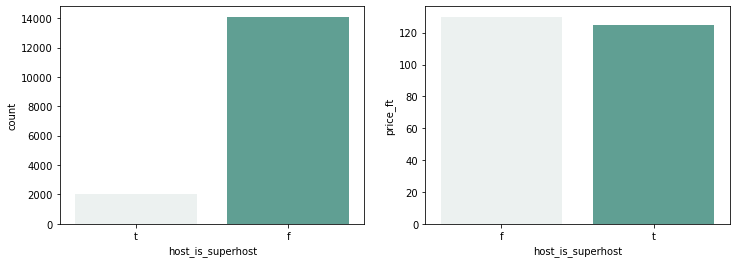

In [73]:
superhost = df2.groupby(['host_is_superhost'], as_index=False).agg({'price_ft': 'median'})
plt.rc('figure', figsize=(12,4))

fig, axs = plt.subplots(nrows=1, ncols=2)

sns.countplot(x='host_is_superhost', data=df2, ax=axs[0], palette='light:#5A9')
sns.barplot(x='host_is_superhost', y='price_ft', data=superhost, ax=axs[1], palette='light:#5A9')

------------------------------

#### Location 

<i> Question: </i> Which location has the most properties and which one is the most expensive?

Answer: <i> De Baarsjes - Oud-West </i> has the most number of properties (2700), while <i> Centrum-Oost </i> is the most expensive area, with median price $150; which makes sense since Centrum-Oost is where many of the attractions and landmarks as well as restaurants etc are present.
Information found here: https://www.thebrokebackpacker.com/where-to-stay-in-amsterdam-netherlands/

It also suggests that Location plays an important role in predicting price.

In [74]:
# Importing the Amsterdam borough boundary GeoJSON file as a dataframe in geopandas
import geopandas as gpd

fileName = r'data/neighbourhoods.geojson'
map_df = gpd.read_file(fileName)
map_df.head()

neighbourhood neighbourhood_group  \
0              Bijlmer-Oost                None   
1                Noord-Oost                None   
2                Noord-West                None   
3                 Oud-Noord                None   
4  IJburg - Zeeburgereiland                None   

                                            geometry  
0  MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...  
1  MULTIPOLYGON Z (((5.07916 52.38865 42.95663, 5...  
2  MULTIPOLYGON Z (((4.93072 52.41161 42.91539, 4...  
3  MULTIPOLYGON Z (((4.95242 52.38983 42.95411, 4...  
4  MULTIPOLYGON Z (((5.03906 52.35458 43.01664, 5...

In [75]:
# Dropping the empty column
map_df.drop('neighbourhood_group', axis=1, inplace=True)

# Creating a dataframe of listing counts and median price by borough
borough_df = pd.DataFrame(df2.groupby('neighbourhood_cleansed').size())
borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df['median_price'] = df2.groupby('neighbourhood_cleansed').price_ft.median().values

# Joining the dataframes
borough_map_df = map_df.set_index('neighbourhood').join(borough_df)

In [76]:
borough_map_df.head()

geometry  \
neighbourhood                                                                 
Bijlmer-Oost              MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...   
Noord-Oost                MULTIPOLYGON Z (((5.07916 52.38865 42.95663, 5...   
Noord-West                MULTIPOLYGON Z (((4.93072 52.41161 42.91539, 4...   
Oud-Noord                 MULTIPOLYGON Z (((4.95242 52.38983 42.95411, 4...   
IJburg - Zeeburgereiland  MULTIPOLYGON Z (((5.03906 52.35458 43.01664, 5...   

                          number_of_listings  median_price  
neighbourhood                                               
Bijlmer-Oost                              80          79.0  
Noord-Oost                               226         118.5  
Noord-West                               323         120.0  
Oud-Noord                                517         125.0  
IJburg - Zeeburgereiland                 395         146.0

In [77]:
borough_map_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 22 entries, Bijlmer-Oost to De Aker - Nieuw Sloten
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   geometry            22 non-null     geometry
 1   number_of_listings  22 non-null     int64   
 2   median_price        22 non-null     float64 
dtypes: float64(1), geometry(1), int64(1)
memory usage: 1.2+ KB


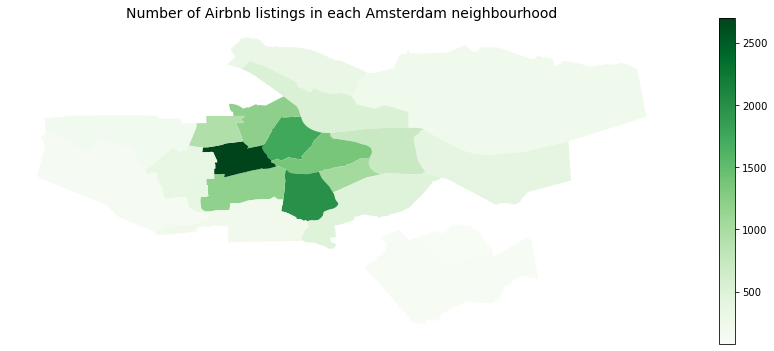

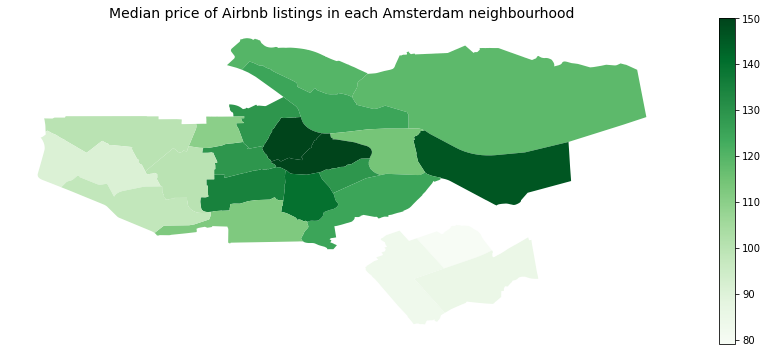

In [78]:
# Plotting the number of listings in each borough
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot('number_of_listings', cmap='Greens', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each Amsterdam neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=min(borough_map_df.number_of_listings), vmax=max(borough_map_df.number_of_listings)))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot('median_price', cmap='Greens', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each Amsterdam neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()


In [79]:
borough_df.sort_values(by='number_of_listings', ascending=False).head(1)

number_of_listings  median_price
neighbourhood_cleansed                                  
De Baarsjes - Oud-West                2700         129.0

In [80]:
borough_df.sort_values(by='median_price', ascending=False).head(1)

number_of_listings  median_price
neighbourhood_cleansed                                  
Centrum-Oost                          1366         150.0

In [81]:
# Looking at value counts for location 

df2['neighbourhood_cleansed'].value_counts(normalize=True)

De Baarsjes - Oud-West                    0.167754
De Pijp - Rivierenbuurt                   0.123268
Centrum-West                              0.108232
Centrum-Oost                              0.084871
Westerpark                                0.074868
Zuid                                      0.074185
Oud-Oost                                  0.064119
Bos en Lommer                             0.057782
Oostelijk Havengebied - Indische Buurt    0.045542
Oud-Noord                                 0.032122
Watergraafsmeer                           0.029574
IJburg - Zeeburgereiland                  0.024542
Slotervaart                               0.021684
Noord-West                                0.020068
Noord-Oost                                0.014042
Buitenveldert - Zuidas                    0.013420
Geuzenveld - Slotermeer                   0.012426
De Aker - Nieuw Sloten                    0.007207
Osdorp                                    0.007083
Gaasperdam - Driemond          

In [82]:
# Grouping certain neighborhoods together
count_neighbourhoods = {}
index_values = df2['neighbourhood_cleansed'].value_counts(normalize=True).index.to_list()
count_values = df2['neighbourhood_cleansed'].value_counts(normalize=True).to_list()
for i in range(len(df2['neighbourhood_cleansed'].drop_duplicates().to_list())):
    count_neighbourhoods[index_values[i]] = count_values[i]

#count_property_types
neighbourhood = []

for i in count_neighbourhoods:
    if count_neighbourhoods[i] > 0.05:
        neighbourhood.append(i)
    else:
        continue
        
df2['neighbourhoods'] = np.where(df2['neighbourhood_cleansed'].isin(neighbourhood), df2['neighbourhood_cleansed'], 'Other')

In [83]:
df2.drop('neighbourhood_cleansed', axis=1, inplace=True)

----------------------------------------

#### Room Type 

<i> Question: </i> What is the most common type of room available? And how does the price vary by room type?

Answer: Most listings are for the entire home/apartment with those costing on average the most. Although private rooms are the next highest category, they are cheaper to rent than hotel rooms. 

<AxesSubplot:xlabel='room_type', ylabel='price_ft'>

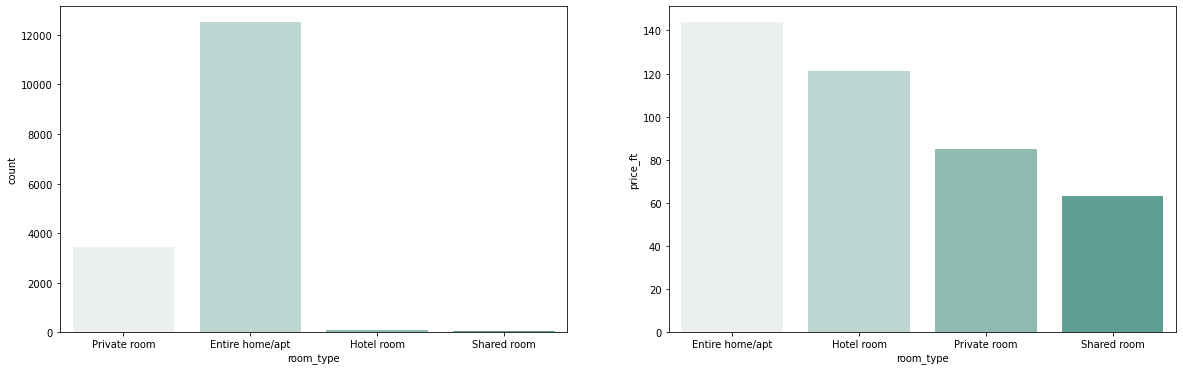

In [84]:
median_room_type = df2.groupby(['room_type'], as_index=False).agg({'price_ft': 'median'})

plt.rc('figure', figsize=(20,6))

fig, axs = plt.subplots(nrows=1, ncols=2)

sns.countplot(x='room_type', data=df2, ax=axs[0], palette='light:#5A9')
sns.barplot(x='room_type', y='price_ft', data=median_room_type, ax=axs[1], palette='light:#5A9')

-------------------------------------------

#### Amenities 


In [85]:
# Creating a set of all possible amenities
amenities_list = list(df2.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
#amenities_set

From the list above, we know certain amenities are likely to be more important than others when determining price. Looking at Airbnb's website, as per their article, these are the most important amenities client tend to look for:

Basic amenities: 

- Toilet paper, Soap for hands and body, One towel per guest, Linens for each bed, One pillow per guest, Cleaning supplies

Top amenities guests search for:*

- A pet-friendly space, Wifi, Free parking, pool, jacuzzi, kitchen, Air conditioning, Heating, A washer, TV or cable

Safety amenities:

- Carbon monoxide alarm, Smoke alarm, Fire extinguisher, First-aid kit, Emergency plan and local numbers

Extras guests appreciate:

- Basic toiletries like shampoo and conditioner, Dish soap and cleaning supplies, Dining basics like a coffee maker, cooking utensils, dishes, and silverware, Wine glasses, Basic cooking supplies like salt, pepper, and oil, Coffee, tea, Light breakfast or snacks, Hangers, Adapters and chargers

Information found here: https://www.airbnb.com/resources/hosting-homes/a/the-amenities-guests-want-25

In [86]:
df2.loc[df2['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df2.loc[df2['amenities'].str.contains('Amazon| Apple TV| Netflix| Game console| Smart TV'), 'high_end_electronics'] = 1
df2.loc[df2['amenities'].str.contains('balcony|patio'), 'balcony'] = 1
df2.loc[df2['amenities'].str.contains('Linen|Bed sheets|Pillow|Blankets'), 'basic_amenities'] = 1
df2.loc[df2['amenities'].str.contains('TV'), 'tv'] = 1
df2.loc[df2['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df2.loc[df2['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df2.loc[df2['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df2.loc[df2['amenities'].str.contains('Elevator'), 'elevator'] = 1
df2.loc[df2['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df2.loc[df2['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df2.loc[df2['amenities'].str.contains('parking'), 'parking'] = 1
df2.loc[df2['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df2.loc[df2['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df2.loc[df2['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df2.loc[df2['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df2.loc[df2['amenities'].str.contains('Pets|pet|Cat|Dog'), 'pets_allowed'] = 1
df2.loc[df2['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df2.loc[df2['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df2.loc[df2['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df2.loc[df2['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df2.loc[df2['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df2.loc[df2['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1
df2.loc[df2['amenities'].str.contains('shampoo|conditioner|coffee|cooking|dishes|silverware|wine glasses|salt|pepper|oil|tea|hangers|adapters|chargers|24-hour check-in'), 'extra_amenities'] = 1
df2.loc[df2['amenities'].str.contains('Smoke alarm|Carbon monoxide alarm|Fire extinguisher|First aid kid'), 'safety_amenities'] = 1

In [87]:
df2.iloc[:,64:].columns

Index(['air_conditioning', 'high_end_electronics', 'balcony',
       'basic_amenities', 'tv', 'coffee_machine', 'cooking_basics',
       'white_goods', 'elevator', 'gym', 'child_friendly', 'parking',
       'outdoor_space', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays',
       'pets_allowed', 'private_entrance', 'secure', 'self_check_in',
       'smoking_allowed', 'accessible', 'event_suitable', 'extra_amenities',
       'safety_amenities'],
      dtype='object')

In [88]:
# replacing nulls with zeros for new columns 
cols_to_replace_nulls = df2.iloc[:,64:].columns
df2[cols_to_replace_nulls] = df2[cols_to_replace_nulls].fillna(0)

In [89]:
# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df2.iloc[:,64:].columns:
    if df2[col].sum() < len(df2)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df2.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df2.drop('amenities', axis=1, inplace=True)

['air_conditioning', 'high_end_electronics', 'basic_amenities', 'elevator', 'gym', 'child_friendly', 'outdoor_space', 'hot_tub_sauna_or_pool', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


<i> Question: </i> Which amenities affect the price of the listings

Answer: There is some correlation between prices and certain amenities being offered. The basic amenities for example, clearly are charging a higher price for their Airbnb's compared to listings thta dont offer those. Similar situation with top and extra amenities.

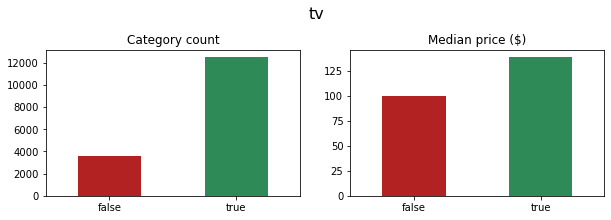

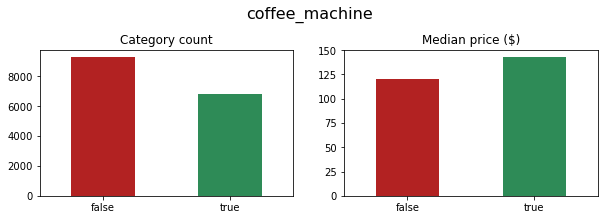

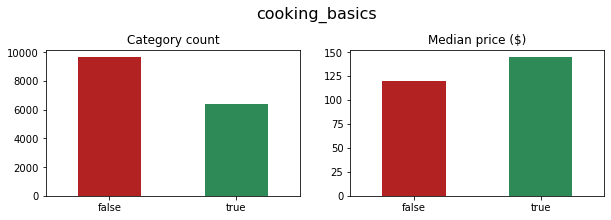

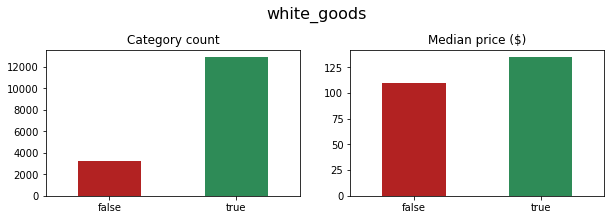

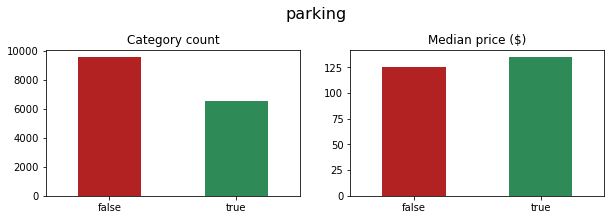

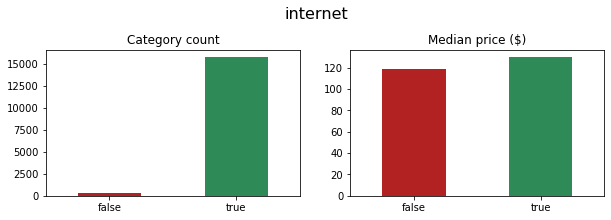

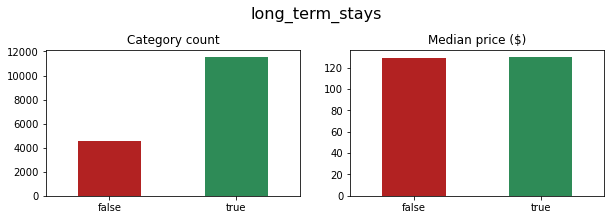

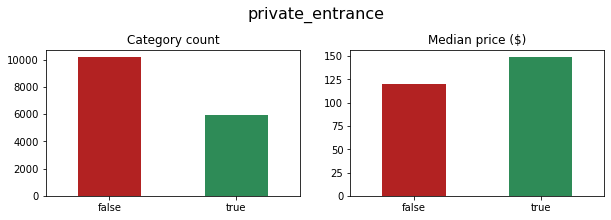

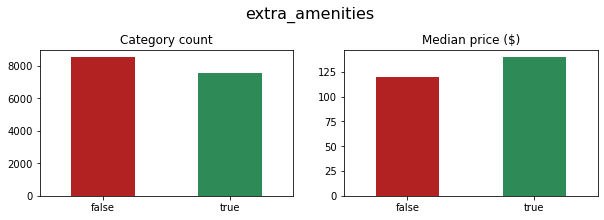

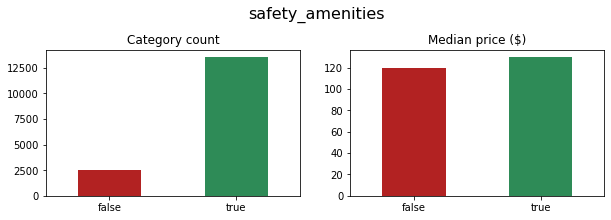

In [90]:
for col in df2.iloc[:,64:].columns:
        plt.rc('figure', figsize=(10,3))
        fig, axs = plt.subplots(nrows=1, ncols=2)
        fig.suptitle(col, fontsize=16, y=1)
        plt.subplots_adjust(top=0.80)
        
        df2.groupby(col).size().plot(kind='bar', ax=axs[0], color=['firebrick', 'seagreen'])
        axs[0].set_xticklabels(labels=['false', 'true'], rotation=0)
        axs[0].set_title('Category count')
        axs[0].set_xlabel('')

        df2.groupby(col).price_ft.median().plot(kind='bar', ax=axs[1], color=['firebrick', 'seagreen'])
        axs[1].set_xticklabels(labels=['false', 'true'], rotation=0)
        axs[1].set_title('Median price ($)')
        axs[1].set_xlabel('')

        plt.show()

------------------------

#### Host Verifications

In [91]:
df2['host_verifications'].drop_duplicates()

0        ['email', 'phone', 'reviews', 'jumio', 'offlin...
2                            ['email', 'phone', 'reviews']
3        ['email', 'phone', 'reviews', 'jumio', 'offlin...
6        ['email', 'phone', 'reviews', 'jumio', 'selfie...
7        ['email', 'phone', 'facebook', 'reviews', 'jum...
                               ...                        
15167    ['email', 'phone', 'google', 'jumio', 'selfie'...
15264    ['email', 'phone', 'reviews', 'weibo', 'zhima_...
15268    ['email', 'phone', 'reviews', 'jumio', 'offlin...
15601    ['email', 'phone', 'manual_online', 'facebook'...
15991    ['email', 'phone', 'jumio', 'government_id', '...
Name: host_verifications, Length: 360, dtype: object

In [92]:
def count_no_of_verifications(verif):
    
    verifications_list = list(verif)
    verifications_list_string = " ".join(verifications_list)
    verifications_list_string = verifications_list_string.replace('[', '')
    verifications_list_string = verifications_list_string.replace(']', '')
    verifications_set = [x.strip() for x in verifications_list_string.split(',')]
    
    return len(verifications_set)

In [93]:
df2['number_of_verifications'] = df2['host_verifications'].apply(lambda x: count_no_of_verifications(x))

In [94]:
df2.head(2)

listing_url       scrape_id last_scraped  \
0   https://www.airbnb.com/rooms/2818  20210907032724   2021-09-07   
1  https://www.airbnb.com/rooms/20168  20210907032724   2021-09-07   

                                           name  \
0      Quiet Garden View Room & Super Fast WiFi   
1  Studio with private bathroom in the centre 1   

                                         description  \
0  Quiet Garden View Room & Super Fast WiFi<br />...   
1  17th century Dutch townhouse in the heart of t...   

                               neighborhood_overview  \
0  Indische Buurt ("Indies Neighborhood") is a ne...   
1  Located just in between famous central canals....   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/10272854/8dcc...     3159   
1  https://a0.muscache.com/pictures/69979628/fd6a...    59484   

                                  host_url  host_name  host_since  \
0   https://www.airbnb.com/users/show/3159     Daniel  2008-09-24   
1  https://www.airbnb.com/users/show/59484  Alexander  2009-12-02   

                               host_location  \
0  Amsterdam, Noord-Holland, The Netherlands   
1  Amsterdam, Noord-Holland, The Netherlands   

                                          host_about host_response_time  \
0  Upon arriving in Amsterdam, one can imagine as...     within an hour   
1                  + (Phone number hidden by Airbnb)     within an hour   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0               100.0                 100.0                 t   
1               100.0                 100.0                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/users/3159/profile_...   
1  https://a0.muscache.com/im/pictures/user/65092...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/3159/profile_...     Indische Buurt   
1  https://a0.muscache.com/im/pictures/user/65092...     Grachtengordel   

   host_listings_count                                 host_verifications  \
0                  1.0  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
1                  2.0  ['email', 'phone', 'reviews', 'jumio', 'offlin...   

  host_has_profile_pic host_identity_verified  \
0                    t                      t   
1                    t                      t   

                           neighbourhood  neighbourhood_group_cleansed  \
0  Amsterdam, North Holland, Netherlands                           NaN   
1  Amsterdam, North Holland, Netherlands                           NaN   

   latitude  longitude                property_type     room_type  \
0  52.36435    4.94358  Private room in rental unit  Private room   
1  52.36407    4.89393    Private room in townhouse  Private room   

   accommodates  bathrooms  bedrooms  beds    price  minimum_nights  \
0             2        1.5       1.0   2.0   $59.00               3   
1             2        1.0       1.0   1.0  $106.00               1   

   maximum_nights  calendar_updated has_availability  availability_30  \
0              28               NaN                t                3   
1             365               NaN                t                0   

  calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  \
0            2021-09-07                280                      2   
1            2021-09-07                339                      0   

   number_of_reviews_l30d first_review review_scores_rating  \
0                       0   2013-08-25                  4-5   
1                       0   2014-01-17                  4-5   

  review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                    4-5                       4-5                   4-5   
1                    4-5                       4-5                   4-5   

  review_scores_communication review_scores_location review_scores_value  \
0        

<i> Question: </i> Do number of different types of host verifications lead to a higher median price of listings?

Answer: Overall there doesnt seem to be any coorelation between types of host verifications and prices. 

<AxesSubplot:xlabel='number_of_verifications', ylabel='price_ft'>

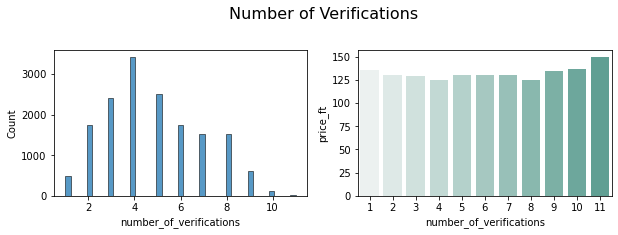

In [95]:
verifications = df2.groupby(['number_of_verifications'], as_index=False)['price_ft'].median()

plt.rc('figure', figsize=(10,3))
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Number of Verifications", fontsize=16, y=1)
plt.subplots_adjust(top=0.80)

sns.histplot(x='number_of_verifications', data=df2, ax=axs[0])
sns.barplot(x='number_of_verifications', y='price_ft', data=verifications, ax=axs[1], palette='light:#5A9')

-------------------------------------------------

#### Host Identity Verified 

<i> Question </i> How many listings have a verified host? And do verified hosts tend to charge more for thier listings?

Answer: There are almost 67% listings that have a verified host, however, the median price is almost equal between the two groups.

In [96]:
df2['host_identity_verified'].value_counts(normalize=True)

t    0.665113
f    0.334887
Name: host_identity_verified, dtype: float64

Text(0.5, 0, '')

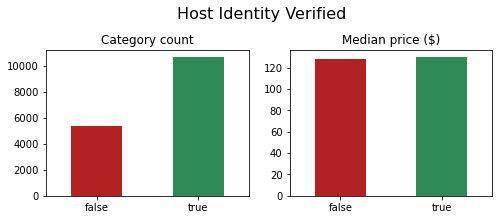

In [97]:
plt.rc('figure', figsize=(8,3))
fig, axs = plt.subplots(nrows=1, ncols=2)

fig.suptitle('Host Identity Verified', fontsize=16, y=1)
plt.subplots_adjust(top=0.80)

df2.groupby('host_identity_verified').size().plot(kind='bar', ax=axs[0], color=['firebrick', 'seagreen'])
axs[0].set_xticklabels(labels=['false', 'true'], rotation=0)
axs[0].set_title('Category count')
axs[0].set_xlabel('')

df2.groupby('host_identity_verified').price_ft.median().plot(kind='bar', ax=axs[1], color=['firebrick', 'seagreen'])
axs[1].set_xticklabels(labels=['false', 'true'], rotation=0)
axs[1].set_title('Median price ($)')
axs[1].set_xlabel('')

-------------------------------------

#### Property Types

<i> Question: </i> What types of properties are listed on Airbnb and how many of each category there are? Does price vary by property type?

Answer: There are 67 different property types; there is also a long tail of properties that are most likely associated with only one or two listings. 

Entire rental unit, Private room in rental unit and Entire resedential home are the top three property types. 

Overall, Boats, house boats and entire townhouses tend to be more expensive than other property types


In [98]:
df2['property_type'].value_counts(normalize=True)

Entire rental unit              0.607207
Private room in rental unit     0.114818
Entire residential home         0.064865
Entire townhouse                0.026654
Entire condominium (condo)      0.021994
                                  ...   
Bus                             0.000062
Shared room in loft             0.000062
Private room in nature lodge    0.000062
Earth house                     0.000062
Room in casa particular         0.000062
Name: property_type, Length: 67, dtype: float64

There are 67 different property types; there is also a long tail of properties that are most likely associated with only one or two listings. 

In [99]:
# Creating a new variable that groups the long tail of property types 
count_property_types = {}
index_values = df2['property_type'].value_counts(normalize=True).index.to_list()
count_values = df2['property_type'].value_counts(normalize=True).to_list()
for i in range(len(df2['property_type'].drop_duplicates().to_list())):
    count_property_types[index_values[i]] = count_values[i]

#count_property_types
property_type_group = []

for i in count_property_types:
    if count_property_types[i] > 0.05:
        property_type_group.append(i)
    else:
        continue
        
df2['property_type_group'] = np.where(df2['property_type'].isin(property_type_group), df2['property_type'], 'Other')

In [100]:
# dropping the old property type column
df2.drop('property_type', axis=1, inplace=True)

Text(0, 0.5, 'Median Price ($)')

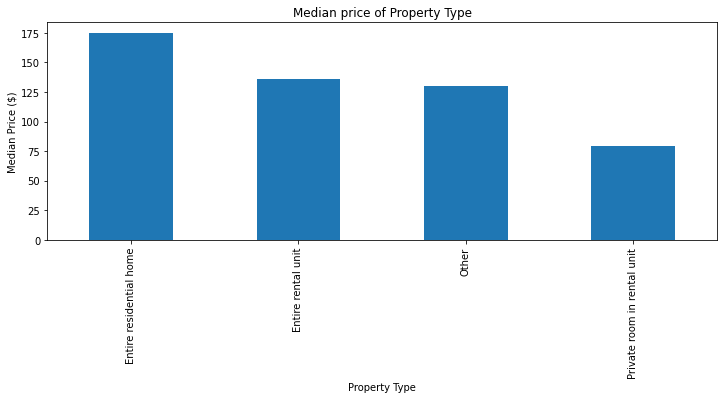

In [101]:
# Next is to check if property types have any correlation with the price 

plt.rc('figure', figsize=(12,4))
fig, axs = plt.subplots(1,1)

df2.groupby('property_type_group').price_ft.median().sort_values(ascending=False).plot(kind='bar')
axs.set_title('Median price of Property Type')
axs.set_xlabel('Property Type')
axs.set_ylabel('Median Price ($)')

-----------------------------------

#### Instant Bookable

In [102]:
df2['instant_bookable'].value_counts(normalize=True)

f    0.769742
t    0.230258
Name: instant_bookable, dtype: float64

Text(0.5, 0, '')

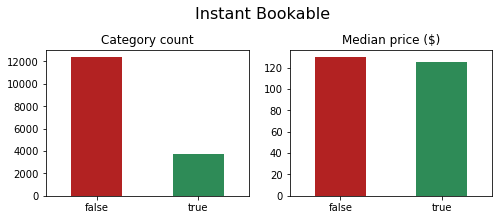

In [103]:
plt.rc('figure', figsize=(8,3))
fig, axs = plt.subplots(nrows=1, ncols=2)

fig.suptitle('Instant Bookable', fontsize=16, y=1)
plt.subplots_adjust(top=0.80)

df2.groupby('instant_bookable').size().plot(kind='bar', ax=axs[0], color=['firebrick', 'seagreen'])
axs[0].set_xticklabels(labels=['false', 'true'], rotation=0)
axs[0].set_title('Category count')
axs[0].set_xlabel('')

df2.groupby('instant_bookable').price_ft.median().plot(kind='bar', ax=axs[1], color=['firebrick', 'seagreen'])
axs[1].set_xticklabels(labels=['false', 'true'], rotation=0)
axs[1].set_title('Median price ($)')
axs[1].set_xlabel('')

------------------------

-------------------------

### Data Wrangling and Cleaning

In [104]:
df2.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'r

In [105]:
# certain columns will be dropped
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 
                'description', 'neighborhood_overview', 'picture_url',
                 'host_id', 'host_url', 'host_name', 'host_location',
                'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
                'host_verifications', 'calendar_last_scraped', 'price', 'calendar_updated',
                'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                'neighbourhood_group_cleansed', 'neighbourhood', 'license', 'host_has_profile_pic', 'first_review',
                'host_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_shared_rooms']

df2.drop(cols_to_drop, axis=1, inplace=True)

In [106]:
df2.shape

(16095, 44)

In [107]:
# Filling in Null values for columns 
columns = df2.columns.to_list()

null_columns = {}
total_rows = df2.shape[0]

for i in columns:
    if df2[i].isnull().sum() > 0:
        perc_null = round((df2[i].isnull().sum()/total_rows)*100,2)
        null_columns[i] = perc_null
    else:
        continue

null_columns

{'bedrooms': 5.5, 'beds': 5.5, 'reviews_per_month': 12.9}

In [108]:
# Filling in median value for bedrooms and beds

df2['bedrooms'].fillna(df2['bedrooms'].median(), inplace=True)
df2['beds'].fillna(df2['beds'].median(), inplace=True)

In [109]:
# Creating dummy variables 
df3 = pd.get_dummies(df2)

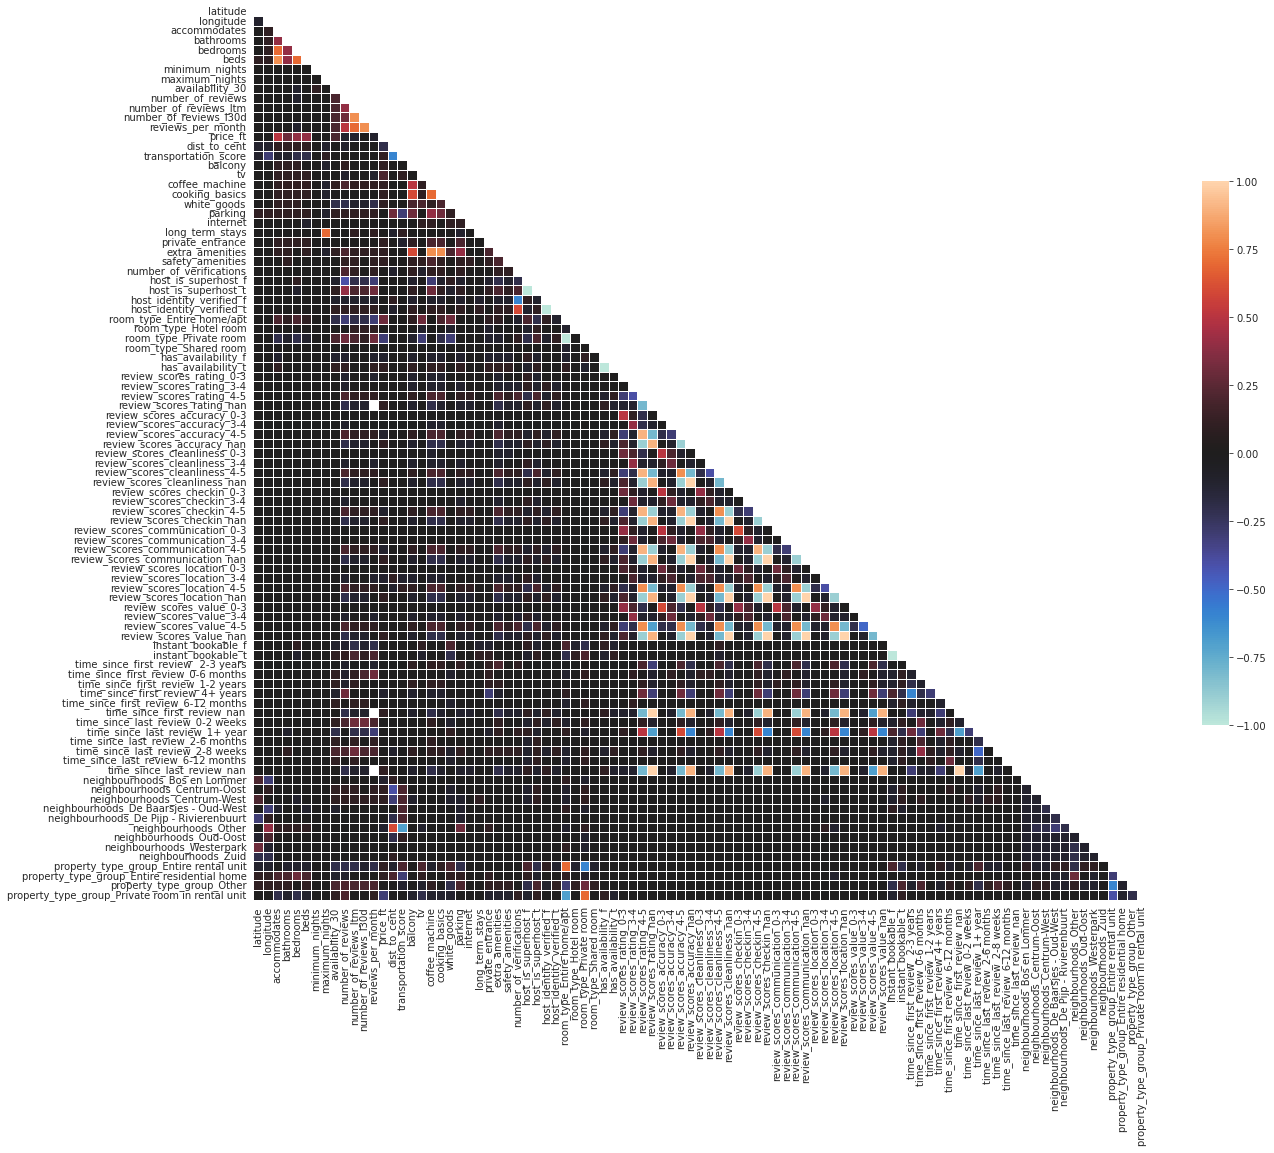

In [110]:
# Checking for relationships between variables 
plt.rc('figure', figsize=(20,20))
corr = df3.corr()
corr = corr.round(1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, 
                xticklabels=corr.columns.values, yticklabels=corr.columns.values,
                square=True, linewidth=0.5, cbar_kws={"shrink":0.5}, center=0)

There are few columns that are highly coorelated. 
- Bedroom, Beds and Bathrooms being highly coorelated with accommodates
- Review columns are all highly coorelated amongst themselves
- calculated_host_listings_count_entire_home is highly coorelated with calculated_host_listings_count_private_rooms
- Property_type_group_entire_rental_unit is highly coorelated with room_type_entire_home
- The true and false columns are highly correlated with each other

In [111]:
df3.columns[df3.columns.str.contains("time_since_last_review")]

Index(['time_since_last_review_0-2 weeks', 'time_since_last_review_1+ year',
       'time_since_last_review_2-6 months', 'time_since_last_review_2-8 weeks',
       'time_since_last_review_6-12 months', 'time_since_last_review_nan'],
      dtype='object')

In [112]:
cols_to_drop = ['bedrooms', 'beds', 'host_is_superhost_f',
                'host_identity_verified_f', 'has_availability_f', 'instant_bookable_f', 'number_of_reviews_ltm',
                'reviews_per_month', 'review_scores_accuracy_0-3', 'review_scores_accuracy_3-4',
                'review_scores_accuracy_4-5', 'review_scores_accuracy_nan',
                'review_scores_cleanliness_0-3', 'review_scores_cleanliness_3-4',
                'review_scores_cleanliness_4-5', 'review_scores_cleanliness_nan',
                'review_scores_checkin_0-3', 'review_scores_checkin_3-4',
                'review_scores_checkin_4-5', 'review_scores_checkin_nan',
                'review_scores_communication_0-3', 'review_scores_communication_3-4',
                'review_scores_communication_4-5', 'review_scores_communication_nan',
                'review_scores_location_0-3', 'review_scores_location_3-4',
                'review_scores_location_4-5', 'review_scores_location_nan',
                'review_scores_value_0-3', 'review_scores_value_3-4',
                'review_scores_value_4-5', 'review_scores_value_nan', 'time_since_last_review_0-2 weeks',
                'time_since_last_review_1+ year',
                'time_since_last_review_2-6 months', 'time_since_last_review_2-8 weeks',
                'time_since_last_review_6-12 months', 'time_since_last_review_nan', 'number_of_reviews_l30d','latitude',
                'longitude']

df3.drop(cols_to_drop, axis=1, inplace=True)

------------------------

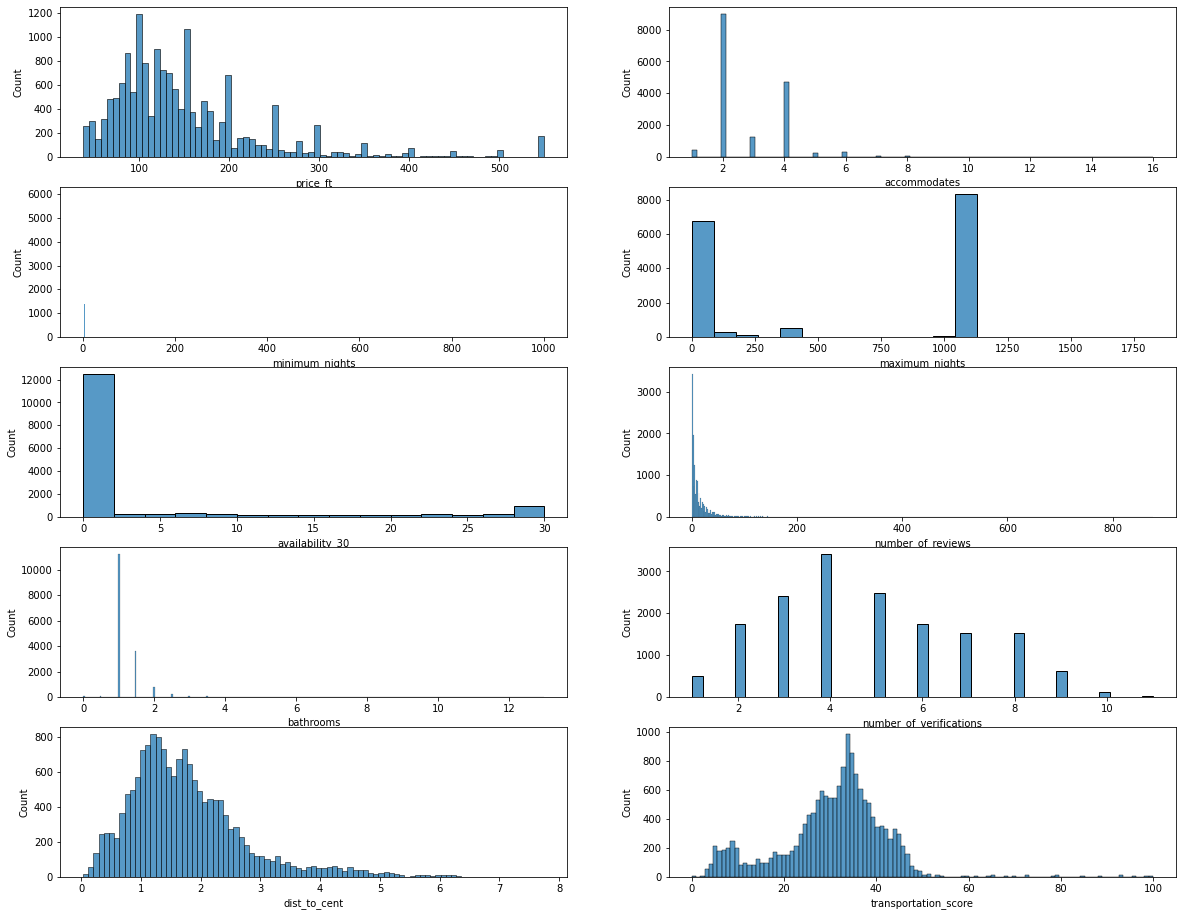

In [113]:
# Looking at numerical data to see if they need to be transformed

cols_to_check = ['price_ft', 'accommodates','minimum_nights', 'maximum_nights', 'availability_30',
                 'number_of_reviews', 'bathrooms', 'number_of_verifications', 'dist_to_cent', 'transportation_score']

plt.rc('figure', figsize=(20,16))

fig, axs = plt.subplots(nrows=5,ncols=2)

for idx, cols in enumerate(cols_to_check):
    ax = axs[int(idx/2), idx%2]
    sns.histplot(x=cols, data=df3, ax=ax)
    ax.set_xlabel(cols)
fig.tight_layout;

In [114]:
# Log transforming columns
for col in cols_to_check:
    df3[col] = df3[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df3[col] = np.log(df3[col])

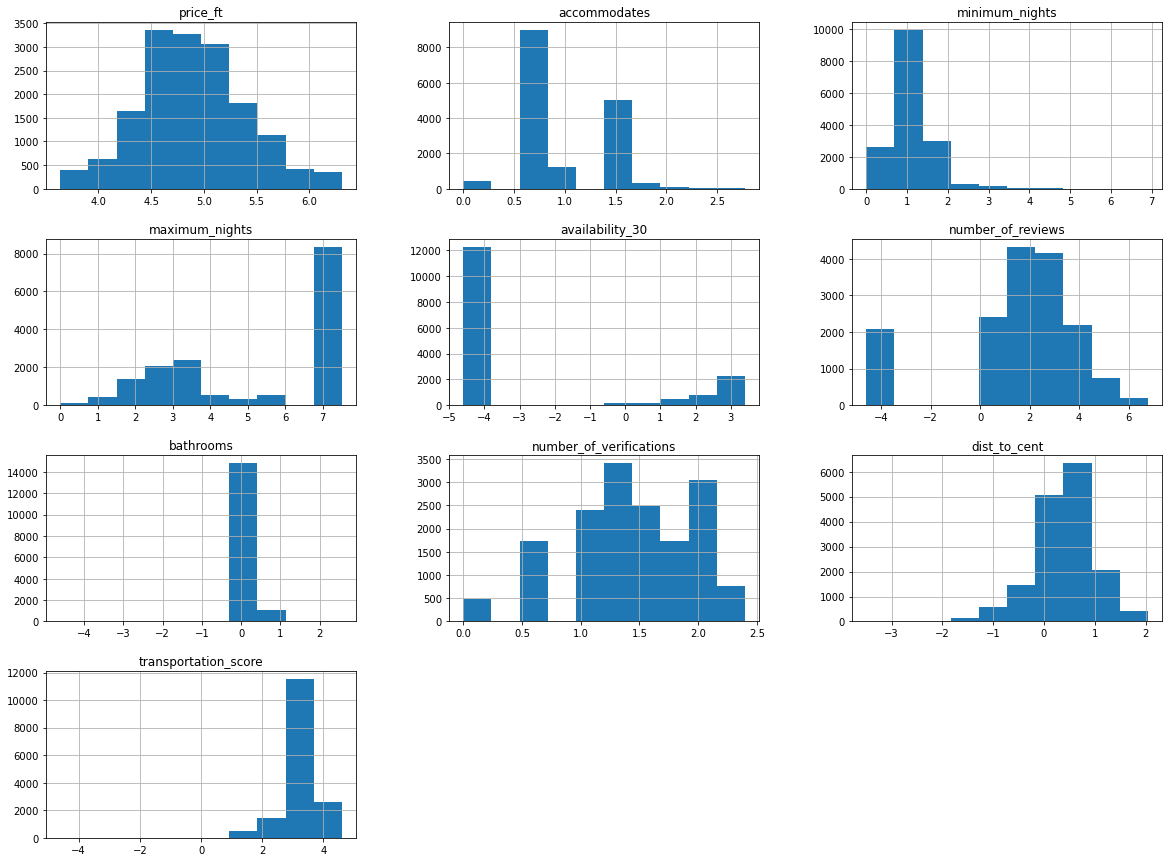

In [115]:
df3[cols_to_check].hist(figsize=(20,15))
plt.show()

### Data Modeling

In [116]:
# Separating predictors and target variables 

y = df3.price_ft.copy()
X = df3.drop(labels=['price_ft'], axis=1)

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, learning_curve, cross_validate, train_test_split, RandomizedSearchCV

In [118]:
# Cross validate model with KFold cross val 

kfold = KFold(n_splits=5)

In [119]:
# Splitting our data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [120]:
X_train.head()

accommodates  bathrooms  minimum_nights  maximum_nights  \
3161      1.386294        0.0        1.098612        4.605170   
3380      0.693147        0.0        1.791759        2.639057   
9317      0.693147        0.0        1.098612        5.899897   
1310      0.693147        0.0        1.386294        3.178054   
9203      1.098612        0.0        0.000000        1.386294   

      availability_30  number_of_reviews  dist_to_cent  transportation_score  \
3161         2.302585           3.761200      0.609962              3.023335   
3380        -4.605170           1.945910      0.039007              3.522200   
9317        -4.605170           4.663439      1.389927              2.815979   
1310        -4.605170           3.583519      0.678323              3.438174   
9203         2.772589           5.416100     -0.046079              3.257999   

      balcony   tv  coffee_machine  cooking_basics  white_goods  parking  \
3161      0.0  1.0             0.0             0.0          1.0      0.0   
3380      0.0  1.0             0.0             0.0          0.0      0.0   
9317      0.0  0.0             1.0             0.0          0.0      1.0   
1310      1.0  1.0             1.0             1.0          1.0      1.0   
9203      0.0  1.0             1.0             0.0          0.0      0.0   

      internet  long_term_stays  private_entrance  extra_amenities  \
3161       1.0              1.0               0.0              0.0   
3380       1.0              0.0               0.0              0.0   
9317       1.0              1.0               0.0              0.0   
1310       1.0              0.0               1.0              1.0   
9203       1.0              0.0               0.0              1.0   

      safety_amenities  number_of_verifications  host_is_superhost_t  \
3161               1.0                 1.386294                    0   
3380               1.0                 1.386294                    0   
9317               1.0                 1.609438                    0   
1310               1.0                 1.386294                    0   
9203               0.0                 1.791759                    1   

      host_identity_verified_t  room_type_Entire home/apt  \
3161                         1                          1   
3380                         1                          1   
9317                         1                          0   
1310                         1                          1   
9203                         1                          0   

      room_type_Hotel room  room_type_Private room  room_type_Shared room  \
3161                     0                       0                      0   
3380                     0                       0                      0   
9317                     1                       0                      0   
1310                     0                       0                      0   
9203                     0                       1                      0   

      has_availability_t  review_scores_rating_0-3  review_scores_rating_3-4  \
3161                   1                         0                         0   
3380                   1                         0                         0   
9317                   1                         0                         0   
1310                   1                         0                         0   
9203                   1                         0                         0   

      review_scores_rating_4-5  review_scores_rating_nan  instant_bookable_t  \
3161                         1                         0                   0   
3380                         1                         0                   0   
9317                         1                         0                   1   
1310                         1                         0                   0   
9203                         1                         0                   1   

      time_since_first_review_ 

In [121]:
# Fitting the base algorithm

random_state = 2

rf = RandomForestRegressor(random_state=random_state, n_estimators=1000)

rf_base = rf.fit(X_train, y_train)

In [122]:
y_pred = rf_base.predict(X_test)

In [123]:
# Evaluate the model 
from sklearn.metrics import mean_squared_error, r2_score 

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {}".format(mse))
print("R2: {}".format(r2))

Mean Squared Error: 0.12289128109517312
R2: 0.5288510204566711


In [124]:
len(X_train.columns)/3

17.0

In [125]:
# Using RandomizedCV to get a general space of parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(600,3000,10)]

# Number of features to consider at every split
max_features = [17,18,19]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,100,10)]

# Minimum number of samples required to split a node
min_samples_split = [2,5,10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

# Method of selecting samples for training each tree
bootstrap = [True,False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [126]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune


rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                              n_iter = 25, scoring = 'neg_mean_squared_error',
                              cv=kfold, verbose=1, random_state=42, n_jobs=5)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_iter=25, n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': [17, 18, 19],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [600, 866, 1133, 1400,
                                                         1666, 1933, 2200, 2466,
                                                         2733, 3000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [127]:
rf_random.best_params_

{'n_estimators': 2200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 19, 'max_depth': 20, 'bootstrap': True}

In [128]:
# Tuning hyperparameters for RandomForest Model 

RFR = RandomForestRegressor()

rf_param_grid = {"max_depth": [15,25],
              "max_features": [19],
              "min_samples_split": [4,6],
              "min_samples_leaf": [1],
              "bootstrap": [True],
              "n_estimators" :[2000,2100,2300],
              "criterion": ["squared_error"]}

scoring = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "r2": "r2"
}
gsRFR = GridSearchCV(RFR,param_grid = rf_param_grid, cv=kfold,
                     scoring=scoring, n_jobs= 4, verbose = 1, return_train_score=True, refit='neg_mean_squared_error')

gsRFR.fit(X_train,y_train)

RFC_best = gsRFR.best_estimator_


# Best score
#gsRFR.best_score_

gsRFR.cv_results_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'mean_fit_time': array([ 98.94,  94.91,  91.68,  77.57,  81.65,  88.91,  95.94,  98.19,
       111.17,  89.  ,  93.7 ,  98.69]), 'std_fit_time': array([1.25, 6.76, 2.2 , 1.54, 1.09, 0.58, 1.24, 0.47, 0.83, 0.32, 0.4 ,
       4.9 ]), 'mean_score_time': array([1.53, 1.66, 1.72, 1.49, 1.58, 1.65, 1.92, 2.01, 2.26, 1.77, 1.88,
       1.62]), 'std_score_time': array([0.04, 0.03, 0.13, 0.07, 0.16, 0.08, 0.03, 0.07, 0.04, 0.02, 0.01,
       0.38]), 'param_bootstrap': masked_array(data=[True, True, True, True, True, True, True, True, True,
                   True, True, True],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object), 'param_criterion': masked_array(data=['squared_error', 'squared_error', 'squared_error',
                   'squared_error', 'squared_error', 'squared_error',
                   'squared_error', 'squared_error', 'squared_error',
                   's

In [129]:
gsRFR.best_score_

-0.11614823272221253

In [130]:
gsRFR.best_estimator_

RandomForestRegressor(max_depth=25, max_features=19, min_samples_split=4,
                      n_estimators=2000)

In [131]:
RFC_best.fit(X_train, y_train)

y_pred = RFC_best.predict(X_test)

In [132]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {}".format(mse))
print("R2: {}".format(r2))

Mean Squared Error: 0.11872951464742003
R2: 0.5448066846623196


There is clearly high variance in this model, probably due to overfitting the training dataset

Text(0.5, 1.0, 'Feature Importances')

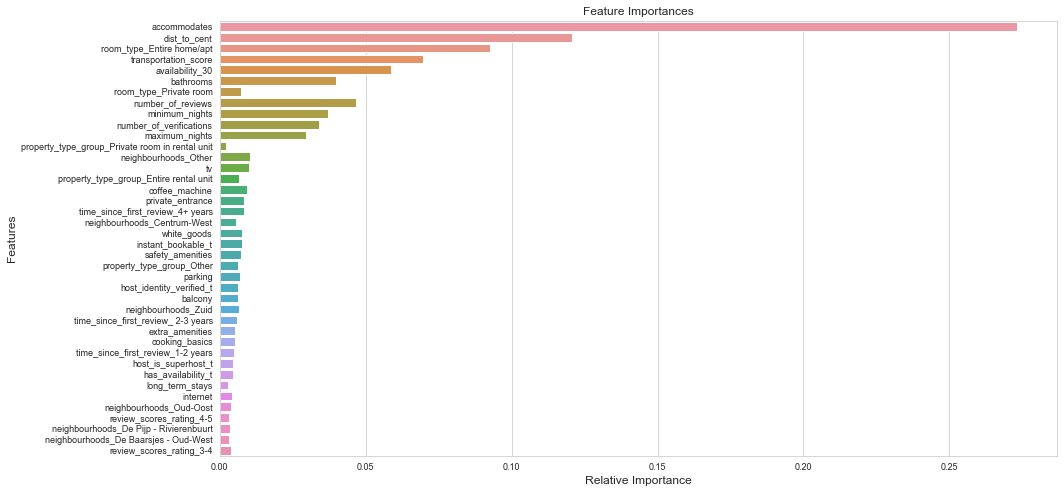

In [136]:
# Feature Importance 
plt.rc('figure', figsize=(15,8))


indices = np.argsort(RFC_best.feature_importances_)[::-1][:40]
g = sns.barplot(y=X_train.columns[indices][:40],
            x=rf_base.feature_importances_[indices][:40],
            orient="h")
g.set_xlabel("Relative Importance", fontsize=12)
g.set_ylabel("Features", fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Feature Importances")

Based on the graph we can see varibles like accommodation, dist_to_center, transportation score are all important varibales and have an impact on price. 

------------------------------

<b> The goal of the project was to better understand variables that impact the price of Airbnb rentals. </b>

We analyzed many variables ranging from reviews, ratings, amenities offered, location, availability and found that location, accommodation, room type and number of reviews played heavily on what the price of the rental would be. We explored the relationships between these variables and price before trying to fit a model to predict it. As part of the exploration, we cleaned the dataset like dropping rows for certain columns, dropping columns like `host_response_rate` that had many null values as well as created few new variables like `dist_to_center` <i> (calculates the distance between each listing and the city center)</i>, `transportation_score`  <i> (gives a score based on how close the locations are to the train/tram stations) </i>, `time_since_first(last)_review` <i> (number of days between current date and the first (last) review) </i>. We also transformed certain variables like price that had unusually high values by setting them to the 99th percentile. 

---------------------------------------

For the model itself, we fit a Random Forest Regression model that would predict price based on all the variables. We used `5 fold cross validation` and used that along with `RandomizedSearchCV` and `GridSearchCV` to tune our model. The tuning helped improve the model compared to our base model, but only slightly. One of the issues we faced with our model is that it is overfitting at the moment. Based on this model we found the different variables that played the most important role in predicting price. 

----------------------------------------

There are a few things we could do to improve our model; 

We could collect more data that might help with the overfitting. 
    
Along with that, one datapoint that we would want to include in a future iteration would be time of the year and the price at that point in time. Since we believe, price would vary depending on the season, adding that as a variable could improve the prediction accuracy. 
    
Another method that we could employ is converting price to a range or categories. Since the price of the rental is set by the customer rather than some algorithm, rentals with identical characteristics could have different prices. To tackle that we could convert price to categories and fit a Classification model instead of a regression. 